# Business Understanding

Because of their weak or non-existent credit history, lending providers find it difficult to provide loans to customers. As a result, some customers take advantage of the situation by becoming defaulters. Assume you work for a consumer finance firm that specialises in making different sorts of loans to urban residents. To analyse the patterns in the data, you must employ EDA. This ensures that only applicants who are capable of repaying the loan are refused.

__The bank's decision is accompanied with two types of risks:__

1. If the applicant is likely to repay the loan, not approving it may result in a business loss for the firm.
2. If the applicant is likely to fail on the loan, approving it may result in a financial loss for the firm.

### Data

The information below belongs to the loan application at the time of application. It has two scenarios:

1. The client having payment difficulties: he/she was more than X days late on at least one of the first Y payments of the loan in our sample.

2. Other cases: When the payment is made on time.

__When a customer requests for a loan, the client/company has four options:__

1. Approved: The Company has approved loan Application.

2. Cancelled: The client cancelled the application sometime during approval. 

3. Refused: The company had rejected the loan.

4. Unused offer:  Loan has been cancelled by the client but on different stages of the process.

## Business Objectives

By identifying trends, this case study may determine whether to refuse a loan, reduce the loan amount, or lend (to riskier applicants) at a higher interest rate. This will prevent customers who can repay the loan from being denied. This case study aims to identify such applications using EDA.

In other words, the corporation needs to know the characteristics that strongly indicate loan default. This information may be used for portfolio and risk evaluation.



# Exploratory Data Analysis

In [1]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Attribute Information

In [2]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):
    columns_description = pd.read_csv("columns_description.csv", encoding="iso-8859-1")
    display(columns_description)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


## Load Data

In [3]:
application_df = pd.read_csv("application_data.csv")
application_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
application_df.shape

(307511, 122)

In [5]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
application_df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [7]:
application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
application_df.SK_ID_CURR.nunique()

307511

## Check Data Quality and Missing Values

In [9]:
def missing_value_percentage(df, frm=0, to=100):
    missing_per = round(df.isnull().sum() * 100 / len(df), 1).sort_values(ascending=False)
    return missing_per[(missing_per > frm) & (missing_per <= to)]

In [10]:
missing_value_percentage(application_df)

COMMONAREA_MEDI             69.9
COMMONAREA_AVG              69.9
COMMONAREA_MODE             69.9
NONLIVINGAPARTMENTS_MODE    69.4
NONLIVINGAPARTMENTS_MEDI    69.4
                            ... 
OBS_60_CNT_SOCIAL_CIRCLE     0.3
DEF_60_CNT_SOCIAL_CIRCLE     0.3
DEF_30_CNT_SOCIAL_CIRCLE     0.3
EXT_SOURCE_2                 0.2
AMT_GOODS_PRICE              0.1
Length: 64, dtype: float64

__Drop columns having more than 50% missing values__

In [11]:
application_df.drop(columns=missing_value_percentage(application_df, 50).index, inplace=True)

In [12]:
application_df.shape

(307511, 81)

__Check columns having more than 30% missing values__

In [13]:
missing_value_percentage(application_df, 30)

FLOORSMAX_AVG                   49.8
FLOORSMAX_MEDI                  49.8
FLOORSMAX_MODE                  49.8
YEARS_BEGINEXPLUATATION_AVG     48.8
YEARS_BEGINEXPLUATATION_MEDI    48.8
YEARS_BEGINEXPLUATATION_MODE    48.8
TOTALAREA_MODE                  48.3
EMERGENCYSTATE_MODE             47.4
OCCUPATION_TYPE                 31.3
dtype: float64

__Drop columns having more than 40% missing values__

In [14]:
application_df.drop(columns=missing_value_percentage(application_df, 40).index, inplace=True)

In [15]:
application_df.shape

(307511, 73)

__Check OCCUPATION_TYPE column__

In [16]:
application_df.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

Occupation type may not have been captured, but it may be an important factor in loan applications; thus, fill in the blanks with "Unknown."

In [17]:
application_df.OCCUPATION_TYPE.fillna("Unknown", inplace=True)

__Check columns having more than 13% missing values__

In [18]:
missing_value_percentage(application_df, 13)

EXT_SOURCE_3                  19.8
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_HOUR    13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
dtype: float64

<AxesSubplot:>

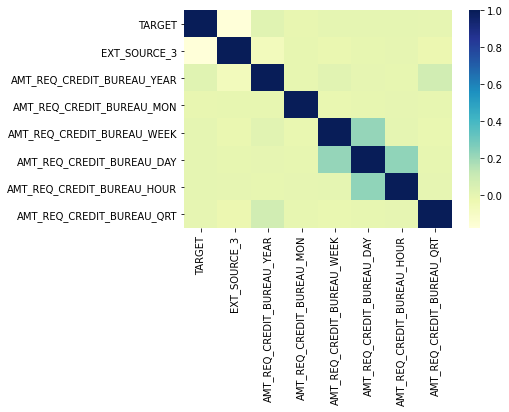

In [19]:
cols13_corr = application_df[["TARGET"] + missing_value_percentage(application_df, 13).index.tolist()].corr()
sns.heatmap(cols13_corr,  cmap="YlGnBu", annot=False)

Since the columns above have weak correlation with the __TARGET__ column and are less significant for imputation, we may drop them.

In [20]:
application_df.drop(columns = missing_value_percentage(application_df, 13).index, inplace = True)

In [21]:
application_df.shape

(307511, 66)

### Check the remaining missing data columns and impute suitably

In [22]:
missing_value_percentage(application_df)

NAME_TYPE_SUITE             0.4
DEF_60_CNT_SOCIAL_CIRCLE    0.3
OBS_60_CNT_SOCIAL_CIRCLE    0.3
DEF_30_CNT_SOCIAL_CIRCLE    0.3
OBS_30_CNT_SOCIAL_CIRCLE    0.3
EXT_SOURCE_2                0.2
AMT_GOODS_PRICE             0.1
dtype: float64

#### AMT_GOODS_PRICE: For consumer loans it is the price of the goods for which the loan is given

In [23]:
application_df.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

<AxesSubplot:ylabel='Frequency'>

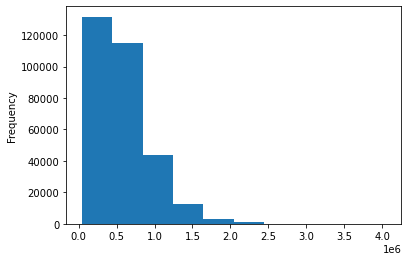

In [24]:
application_df.AMT_GOODS_PRICE.plot.hist()

Check the contract type of the applications where the Goods Price is missing

In [25]:
application_df[application_df.AMT_GOODS_PRICE.isnull()].NAME_CONTRACT_TYPE.value_counts()

Revolving loans    278
Name: NAME_CONTRACT_TYPE, dtype: int64

__Revolving loans:__ A revolving loan facility is a kind of credit granted by a financial institution that allows the borrower to draw down or withdraw funds, repay, then withdraw funds again.

__Example:__ credit include credit cards, and personal and business lines of credit.

These forms of loans inquiry for 0 or less in ___goods price___, hence the missing values are imputed with 0.

In [26]:
application_df.AMT_GOODS_PRICE.fillna(0, inplace=True)

#### NAME_TYPE_SUITE: Who was accompanying client when he was applying for the loan

<AxesSubplot:>

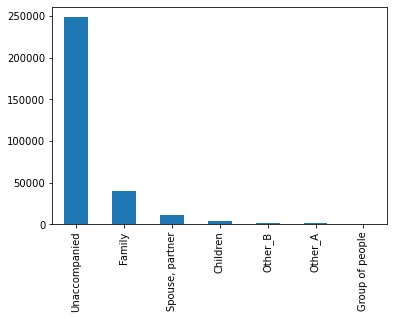

In [27]:
application_df.NAME_TYPE_SUITE.value_counts().plot.bar()

It is preferable to treat missing values as unaccompanied since this is the most common circumstance based on the data. Furthermore, if any relevant or notable related to the customer came, it would have been recorded.

In [28]:
application_df.NAME_TYPE_SUITE.mode()

0    Unaccompanied
dtype: object

In [29]:
application_df.NAME_TYPE_SUITE.fillna("Unaccompanied", inplace=True)

In [30]:
application_df.NAME_TYPE_SUITE.isnull().sum()

0

__EXT_SOURCE_2: Normalized score from external data source__

In [31]:
application_df.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

<AxesSubplot:ylabel='Frequency'>

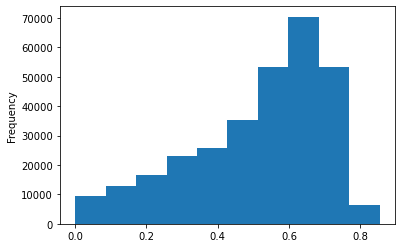

In [32]:
application_df.EXT_SOURCE_2.plot.hist()

In [33]:
application_df[application_df.EXT_SOURCE_2.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
329,100377,0,Cash loans,M,N,N,2,157500.0,239850.0,25447.5,...,0,0,0,0,0,0,0,0,0,0
349,100402,0,Cash loans,F,N,Y,0,81000.0,276277.5,21825.0,...,0,0,0,0,0,0,0,0,0,0
617,100706,0,Cash loans,F,N,Y,0,180000.0,533668.5,22738.5,...,0,0,0,0,0,0,0,0,0,0
1028,101189,0,Cash loans,F,Y,Y,0,121500.0,909000.0,36180.0,...,0,0,0,0,0,0,0,0,0,0
1520,101787,0,Cash loans,M,Y,Y,0,225000.0,269550.0,21294.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305775,454274,0,Cash loans,F,N,N,1,225000.0,566055.0,18387.0,...,0,0,0,0,0,0,0,0,0,0
306208,454779,0,Cash loans,M,N,Y,0,112500.0,562491.0,23832.0,...,0,0,0,0,0,0,0,0,0,0
306235,454811,0,Cash loans,F,N,Y,0,112500.0,343800.0,16155.0,...,0,0,0,0,0,0,0,0,0,0
307029,455713,0,Cash loans,F,Y,N,2,153000.0,808650.0,26217.0,...,0,0,0,0,0,0,0,0,0,0


Looking at the missing ___External Score___ observations, it seems that they are missing at random. As a result, we could use the average score to fill in the missing values.

In [34]:
application_df.EXT_SOURCE_2.fillna(application_df.EXT_SOURCE_2.mean(), inplace=True)

__Social Surroundings defaulted information column__

- DEF_30_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings defaulted on 30 DPD (days past due)
- OBS_30_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings with observable 30 DPD (days past due) default
- DEF_60_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings defaulted on 60 DPD (days past due)
- OBS_60_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings with observable 60 DPD (days past due) default

There may be a lack of knowledge regarding the customers' social surroundings, which may be the cause for the missing values of the above variables. We can impute them with either median or mode value.

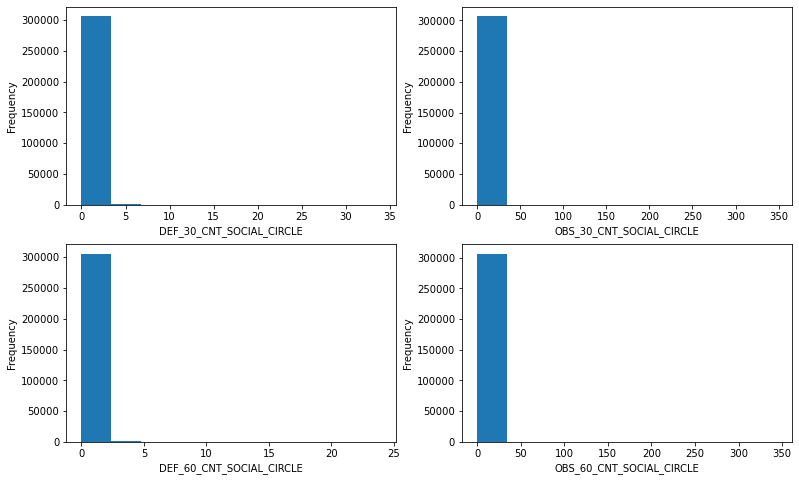

In [35]:
plt.figure(figsize = (13, 8))
plt.subplot(2, 2, 1)
plt.xlabel("DEF_30_CNT_SOCIAL_CIRCLE")
application_df.DEF_30_CNT_SOCIAL_CIRCLE.plot.hist()
plt.subplot(2, 2, 2)
plt.xlabel("OBS_30_CNT_SOCIAL_CIRCLE")
application_df.OBS_30_CNT_SOCIAL_CIRCLE.plot.hist()
plt.subplot(2, 2, 3)
plt.xlabel("DEF_60_CNT_SOCIAL_CIRCLE")
application_df.DEF_60_CNT_SOCIAL_CIRCLE.plot.hist()
plt.subplot(2, 2, 4)
plt.xlabel("OBS_60_CNT_SOCIAL_CIRCLE")
application_df.OBS_60_CNT_SOCIAL_CIRCLE.plot.hist()
plt.show()

In [36]:
print("DEF_30_CNT_SOCIAL_CIRCLE Median:", application_df.DEF_30_CNT_SOCIAL_CIRCLE.median())
print("OBS_30_CNT_SOCIAL_CIRCLE Median:", application_df.OBS_30_CNT_SOCIAL_CIRCLE.median())
print("DEF_60_CNT_SOCIAL_CIRCLE Median:", application_df.DEF_60_CNT_SOCIAL_CIRCLE.median())
print("OBS_60_CNT_SOCIAL_CIRCLE Median:", application_df.OBS_60_CNT_SOCIAL_CIRCLE.median())

DEF_30_CNT_SOCIAL_CIRCLE Median: 0.0
OBS_30_CNT_SOCIAL_CIRCLE Median: 0.0
DEF_60_CNT_SOCIAL_CIRCLE Median: 0.0
OBS_60_CNT_SOCIAL_CIRCLE Median: 0.0


In [37]:
application_df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(application_df.DEF_30_CNT_SOCIAL_CIRCLE.median(), inplace = True)
application_df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(application_df.OBS_30_CNT_SOCIAL_CIRCLE.median(), inplace = True)
application_df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(application_df.DEF_60_CNT_SOCIAL_CIRCLE.median(), inplace = True)
application_df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(application_df.OBS_60_CNT_SOCIAL_CIRCLE.median(), inplace = True)

In [38]:
missing_value_percentage(application_df)

Series([], dtype: float64)

__Look for any other columns that seem to be unimportant__

In [39]:
application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE

In [40]:
flag_document_cols = [c for c in application_df.columns if "FLAG_DOCUMENT_" in c]
flag_document_cols

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

<AxesSubplot:>

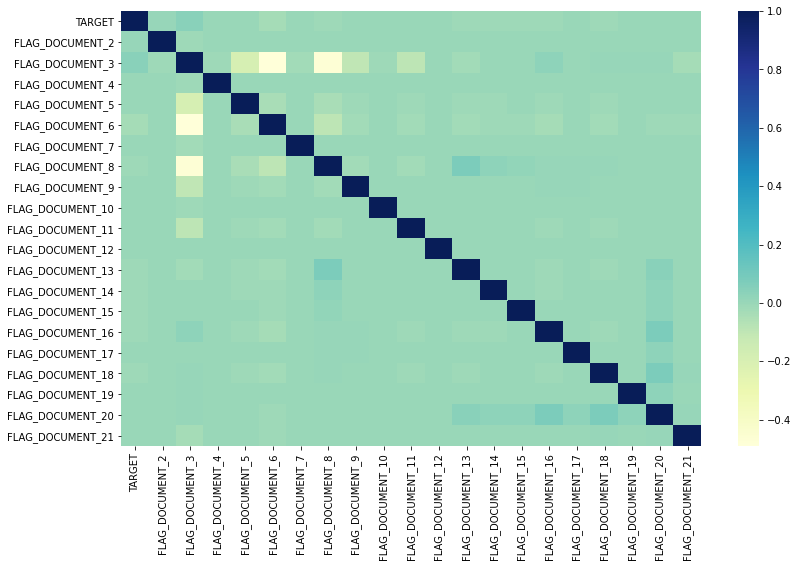

In [41]:
flag_doc_corr = round(application_df[["TARGET"] + flag_document_cols].corr(), 2)
plt.figure(figsize = (13, 8))

sns.heatmap(flag_doc_corr,  cmap="YlGnBu", annot=False)

These ___flag document___ columns less correlation with the ___TARGET___ variable as well as dosn't have enough information to explore more. Hence we can drop these columns.

In [42]:
application_df.drop(columns = flag_document_cols, inplace=True)

In [43]:
application_df.shape

(307511, 46)

## Data Type Check and Transformation

<AxesSubplot:>

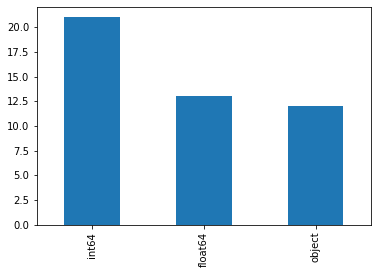

In [44]:
application_df.dtypes.value_counts().plot.bar()

### Check object type columns

In [45]:
application_df.dtypes[application_df.dtypes == object]

NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
NAME_TYPE_SUITE               object
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
OCCUPATION_TYPE               object
WEEKDAY_APPR_PROCESS_START    object
ORGANIZATION_TYPE             object
dtype: object

__NAME_CONTRACT_TYPE:__ Identification if loan is cash or revolving

In [46]:
application_df.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

__CODE_GENDER:__ Gender of the client

In [47]:
application_df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

A small number of values are missing that may be eliminated to make the analysis more effective.

In [48]:
application_df = application_df[application_df.CODE_GENDER != "XNA"]

In [49]:
application_df.CODE_GENDER = application_df.CODE_GENDER.replace({"F": "Female", "M": "Male"})
application_df.CODE_GENDER.value_counts()

C:\Users\santh\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Female    202448
Male      105059
Name: CODE_GENDER, dtype: int64

__FLAG_OWN_CAR:__ Flag if the client owns a car

Map the column values with appropriate label

In [50]:
application_df.FLAG_OWN_CAR.value_counts()

N    202922
Y    104585
Name: FLAG_OWN_CAR, dtype: int64

<AxesSubplot:>

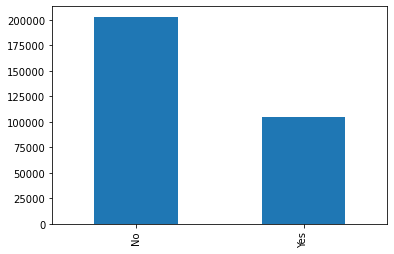

In [51]:
application_df.FLAG_OWN_CAR = application_df.FLAG_OWN_CAR.map({"N": "No", "Y": "Yes"})
application_df.FLAG_OWN_CAR.value_counts().plot.bar()

__FLAG_OWN_REALTY:__ Flag if client owns a house or flat
    
Map the column values with appropriate label

In [52]:
application_df.FLAG_OWN_REALTY.value_counts()

Y    213308
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

<AxesSubplot:>

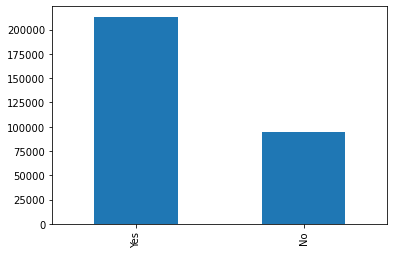

In [53]:
application_df.FLAG_OWN_REALTY = application_df.FLAG_OWN_REALTY.map({"N": "No", "Y": "Yes"})
application_df.FLAG_OWN_REALTY.value_counts().plot.bar()

In [54]:
application_df.NAME_FAMILY_STATUS.value_counts()

Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

A small number of values are unknown that may be eliminated to make the analysis more effective.

In [55]:
application_df = application_df[application_df.NAME_FAMILY_STATUS != "Unknown"]

In [56]:
application_df.shape

(307505, 46)

### Check Numeric Columns

In [57]:
application_df.dtypes[application_df.dtypes == "float64"]

AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
REGION_POPULATION_RELATIVE    float64
DAYS_REGISTRATION             float64
CNT_FAM_MEMBERS               float64
EXT_SOURCE_2                  float64
OBS_30_CNT_SOCIAL_CIRCLE      float64
DEF_30_CNT_SOCIAL_CIRCLE      float64
OBS_60_CNT_SOCIAL_CIRCLE      float64
DEF_60_CNT_SOCIAL_CIRCLE      float64
DAYS_LAST_PHONE_CHANGE        float64
dtype: object

__Amount columns sanity check__

- AMT_INCOME_TOTAL: Income of the client
- AMT_CREDIT: Credit amount of the loan
- AMT_ANNUITY: Loan annuity
- AMT_GOODS_PRICE: For consumer loans it is the price of the goods for which the loan is given

In [58]:
amount_cols = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]

In [59]:
application_df[amount_cols].head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,202500.0,406597.5,24700.5,351000.0
1,270000.0,1293502.5,35698.5,1129500.0
2,67500.0,135000.0,6750.0,135000.0
3,135000.0,312682.5,29686.5,297000.0
4,121500.0,513000.0,21865.5,513000.0


In [60]:
application_df[amount_cols].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,3.075050e+05,3.075050e+05,307493.000000,3.075050e+05
mean,1.687967e+05,5.990284e+05,27108.638224,5.379145e+05
std,2.371248e+05,4.024939e+05,14493.840051,3.696332e+05
min,2.565000e+04,4.500000e+04,1615.500000,0.000000e+00
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06


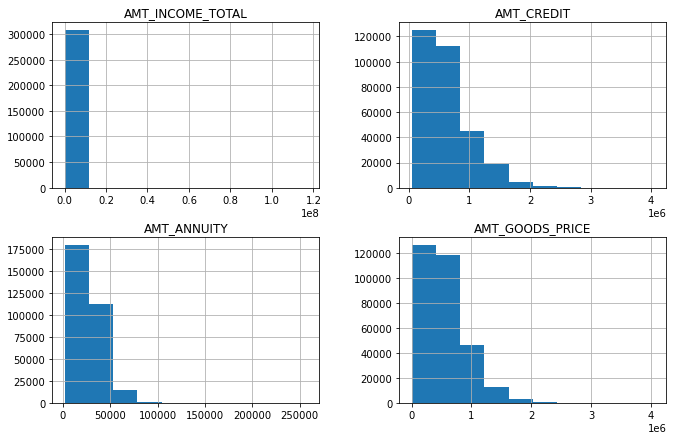

In [61]:
application_df[amount_cols].hist(figsize=(11,7))
plt.show()

Observation - The columns shown above have the right datatype.

Convert __DAYS_REGISTRATION__ and __DAYS_LAST_PHONE_CHANGE__ to integer

In [62]:
try:
    application_df.DAYS_LAST_PHONE_CHANGE.astype("int64")
except Exception as e:
    print(e)

Cannot convert non-finite values (NA or inf) to integer


In [63]:
application_df[np.isnan(application_df.DAYS_LAST_PHONE_CHANGE)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
15709,118330,0,Cash loans,Male,Yes,Yes,0,126000.0,278613.0,25911.0,...,0,0,0,Trade: type 3,0.514393,0.0,0.0,0.0,0.0,NaN


In [64]:
application_df.DAYS_LAST_PHONE_CHANGE = application_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: 0 if np.isnan(x) else x).astype("int64")

In [65]:
application_df.DAYS_REGISTRATION = application_df.DAYS_REGISTRATION.astype("int64")

__Check Count Columns__ 

- CNT_FAM_MEMBERS: How many family members does client have
- OBS_30_CNT_SOCIAL_CIRCLE: How many observation of client's social surroundings with observable 30 DPD (days past due) default
- DEF_30_CNT_SOCIAL_CIRCLE: How many observation of client's social surroundings defaulted on 30 DPD (days past due)
- OBS_60_CNT_SOCIAL_CIRCLE: How many observation of client's social surroundings with observable 60 DPD (days past due) default
- DEF_60_CNT_SOCIAL_CIRCLE: How many observation of client's social surroundings defaulted on 60 (days past due) DPD

In [66]:
count_cols = ["CNT_FAM_MEMBERS", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"]

In [67]:
application_df[count_cols].head()

,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,1.0,2.0,2.0,2.0,2.0
1,2.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,2.0,2.0,0.0,2.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [68]:
application_df[count_cols].describe()

,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000
mean,2.152658,1.417483,0.142931,1.400585,0.099702
std,0.910680,2.398343,0.445980,2.377171,0.361666
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,0.000000,2.000000,0.000000
max,20.000000,348.000000,34.000000,344.000000,24.000000


In [69]:
for c in count_cols:
    try:
        application_df[c].astype(int)
    except Exception as e:
        print(c, ':', e)

In [70]:
application_df[np.isnan(application_df.CNT_FAM_MEMBERS)].CNT_FAM_MEMBERS

Series([], Name: CNT_FAM_MEMBERS, dtype: float64)

It will be more reasonable to fill the CNT FAM MEMBERS column with the median number of family numbers rather than 0

In [71]:
application_df.CNT_FAM_MEMBERS.median()

2.0

In [72]:
application_df.CNT_FAM_MEMBERS = application_df.CNT_FAM_MEMBERS.apply(lambda x: 2 if np.isnan(x) else x)

In [73]:
application_df[count_cols] = application_df[count_cols].astype(int)

__Explore Integer Columns__

In [74]:
application_df.dtypes[application_df.dtypes == "int64"]

SK_ID_CURR                     int64
TARGET                         int64
CNT_CHILDREN                   int64
DAYS_BIRTH                     int64
DAYS_EMPLOYED                  int64
DAYS_REGISTRATION              int64
DAYS_ID_PUBLISH                int64
FLAG_MOBIL                     int64
FLAG_EMP_PHONE                 int64
FLAG_WORK_PHONE                int64
FLAG_CONT_MOBILE               int64
FLAG_PHONE                     int64
FLAG_EMAIL                     int64
REGION_RATING_CLIENT           int64
REGION_RATING_CLIENT_W_CITY    int64
HOUR_APPR_PROCESS_START        int64
REG_REGION_NOT_LIVE_REGION     int64
REG_REGION_NOT_WORK_REGION     int64
LIVE_REGION_NOT_WORK_REGION    int64
REG_CITY_NOT_LIVE_CITY         int64
REG_CITY_NOT_WORK_CITY         int64
LIVE_CITY_NOT_WORK_CITY        int64
DAYS_LAST_PHONE_CHANGE         int64
dtype: object

__Days column sanity check__

 - DAYS_BIRTH: Client's age in days at the time of application
 - DAYS_EMPLOYED: How many days before the application the person started current employment
 - DAYS_ID_PUBLISH: How many days before the application did client change the identity document with which he applied for the loan
 - DAYS_REGISTRATION: How many days before the application did client change his registration
 - DAYS_LAST_PHONE_CHANGE: How many days before application did client change phone

In [75]:
day_cols = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_ID_PUBLISH", "DAYS_REGISTRATION", "DAYS_LAST_PHONE_CHANGE"]

In [76]:
application_df[day_cols].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-2120,-3648,-1134
1,-16765,-1188,-291,-1186,-828
2,-19046,-225,-2531,-4260,-815
3,-19005,-3039,-2437,-9833,-617
4,-19932,-3038,-3458,-4311,-1106


In [77]:
application_df[day_cols].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE
count,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000
mean,-16037.049495,63816.348794,-2994.201437,-4986.147994,-962.858701
std,4363.987877,141276.836143,1509.454886,3522.887818,826.814456
min,-25229.000000,-17912.000000,-7197.000000,-24672.000000,-4292.000000
25%,-19682.000000,-2760.000000,-4299.000000,-7480.000000,-1570.000000
50%,-15750.000000,-1213.000000,-3254.000000,-4504.000000,-757.000000
75%,-12413.000000,-289.000000,-1720.000000,-2010.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


As day counts cannot be negative, they must be corrected to positive. 

In [78]:
application_df[day_cols] = abs(application_df[day_cols])
application_df[day_cols].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE
count,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000
mean,16037.049495,67726.005847,2994.201437,4986.147994,962.858701
std,4363.987877,139444.817987,1509.454886,3522.887818,826.814456
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,1720.000000,2010.000000,274.000000
50%,15750.000000,2219.000000,3254.000000,4504.000000,757.000000
75%,19682.000000,5707.000000,4299.000000,7480.000000,1570.000000
max,25229.000000,365243.000000,7197.000000,24672.000000,4292.000000


__Check Flag Columns__

If the above flag columns are mapped to a more descriptive value, they will be more descriptive.

- FLAG_MOBIL: Did client provide mobile phone (1=YES, 0=NO)
- FLAG_EMP_PHONE: Did client provide work phone (1=YES, 0=NO)
- FLAG_WORK_PHONE: Did client provide home phone (1=YES, 0=NO)
- FLAG_CONT_MOBILE: Was mobile phone reachable (1=YES, 0=NO)
- FLAG_PHONE: Did client provide home phone (1=YES, 0=NO)
- FLAG_EMAIL: Did client provide email (1=YES, 0=NO)

Map the 1's and 0's to YES and NO respectively

In [79]:
flag_cols = ["FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL"] 

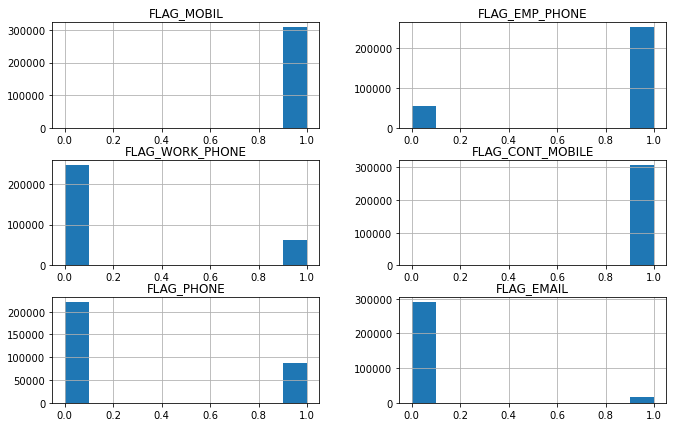

In [80]:
application_df[flag_cols].hist(figsize=(11, 7))
plt.show()

In [81]:
application_df[flag_cols] = application_df[flag_cols].replace({0: "NO", 1: "YES"})
application_df[flag_cols].head()

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL
0,YES,YES,NO,YES,YES,NO
1,YES,YES,NO,YES,YES,NO
2,YES,YES,YES,YES,YES,NO
3,YES,YES,NO,YES,NO,NO
4,YES,YES,NO,YES,NO,NO


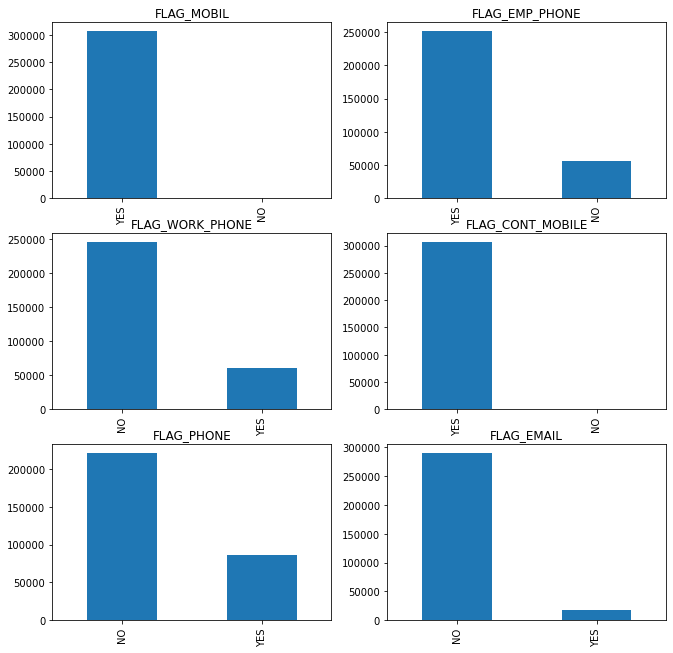

In [82]:
plt.figure(figsize=(11, 11))
for i, c in enumerate(flag_cols):
    plt.subplot(3, 2, i+1)
    plt.title(c)
    application_df[c].value_counts().plot.bar()
plt.show()

__Check Region Columns__

REGION_RATING_CLIENT - Our rating of the region where client lives (1,2,3)     
REGION_RATING_CLIENT_W_CITY - Our rating of the region where client lives with taking city into account (1,2,3)        
REG_REGION_NOT_LIVE_REGION - Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)
REG_REGION_NOT_WORK_REGION - Flag if client's permanent address does not match work address (1=different, 0=same, at region level)    
LIVE_REGION_NOT_WORK_REGION - Flag if client's contact address does not match work address (1=different, 0=same, at region level)
REG_CITY_NOT_LIVE_CITY - Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)    
REG_CITY_NOT_WORK_CITY - Flag if client's permanent address does not match work address (1=different, 0=same, at city level)     
LIVE_CITY_NOT_WORK_CITY -  Flag if client's contact address does not match work address (1=different, 0=same, at city level)

Map above columns with appropriate values

In [83]:
region_cols = ["REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", 
              "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY"]

In [84]:
application_df[region_cols].head()

,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,1,1


In [85]:
application_df[region_cols] = application_df[region_cols].replace({0: "Different", 1: "Same"})
application_df[region_cols].head()

,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,Different,Different,Different,Different,Different,Different
1,Different,Different,Different,Different,Different,Different
2,Different,Different,Different,Different,Different,Different
3,Different,Different,Different,Different,Different,Different
4,Different,Different,Different,Different,Same,Same


In [86]:
application_df.shape  

(307505, 46)

In [87]:
application_df[application_df.dtypes[application_df.dtypes == "int64"].index] = application_df[application_df.dtypes[application_df.dtypes == "int64"].index].astype("int32")

<AxesSubplot:>

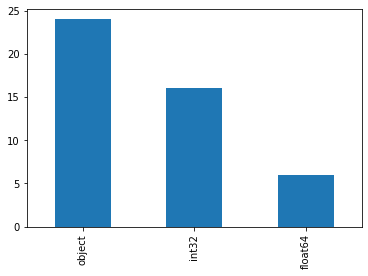

In [88]:
application_df.dtypes.value_counts().plot.bar()

### Examine Outliers

__Identify outliers for the Amount variables__

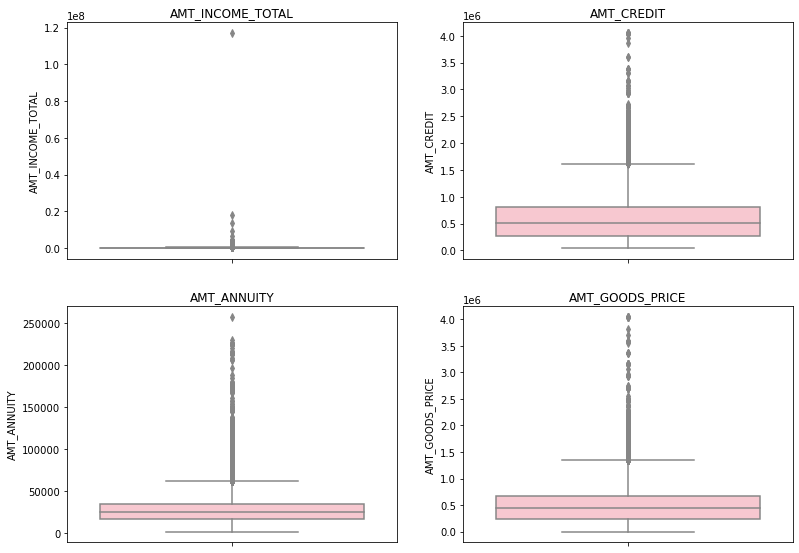

In [89]:
plt.figure(figsize=(13,20))
for i, col in enumerate(amount_cols):
    plt.subplot(4, 2 , i+1)
    sns.boxplot(y = application_df[col], color="pink")
    plt.title(col)

Among the amount-related variables, __AMT_INCOME_TOTAL__ has a large number of outliers, indicating that only a small percentage of loan applicants have a high income when compared to the rest. 

However one observation is more than hundred million which can better be removed for a better analysis.

In [90]:
application_df[application_df.AMT_INCOME_TOTAL > 100000000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
12840,114967,1,Cash loans,Female,No,Yes,1,117000000.0,562491.0,26194.5,...,Different,Different,Different,Business Entity Type 3,0.113161,0,0,0,0,0


In [91]:
application_df = application_df[application_df.AMT_INCOME_TOTAL < 100000000]

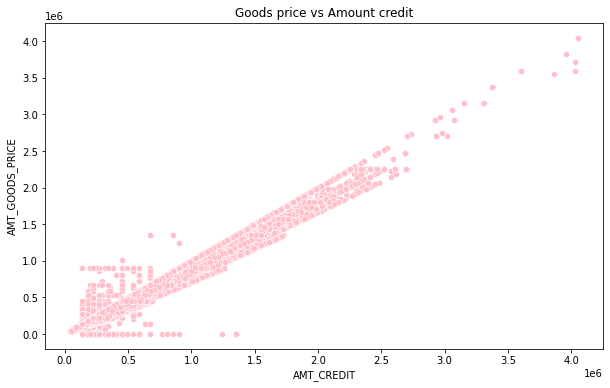

In [92]:
plt.figure(figsize=(10, 6))
plt.title("Goods price vs Amount credit")
sns.scatterplot(y="AMT_GOODS_PRICE", x="AMT_CREDIT", data=application_df, color="pink")
plt.show()

Amount credited vs goods price are very well correlated without much outliers

__Find outliers for the Social Circle variables__

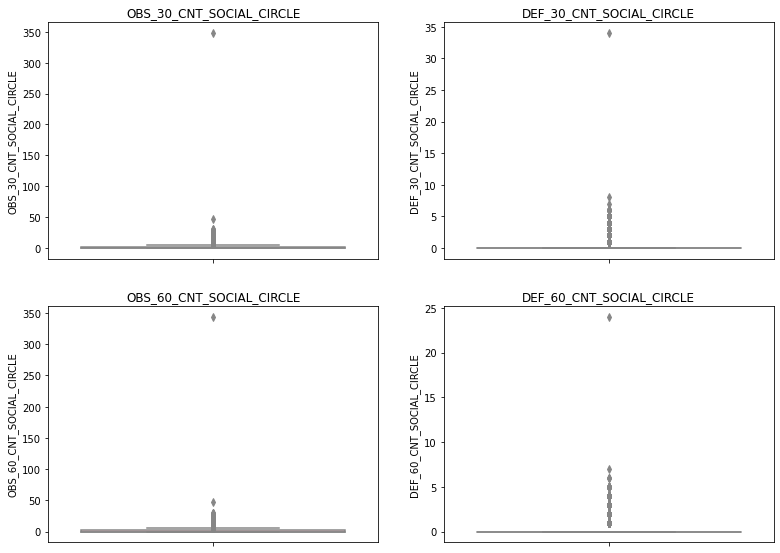

In [93]:
plt.figure(figsize=(13,20))
for i, col in enumerate(count_cols):
    if i==0:
        continue
    plt.subplot(4, 2 , i)
    sns.boxplot(y = application_df[col], color="pink")
    plt.title(col)

Every Social Circle feature (__OBS_30_CNT_SOCIAL_CIRCLE, OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE__)  includes at least one notable outlier that may be checked for sanity.

In [94]:
application_df[application_df.OBS_30_CNT_SOCIAL_CIRCLE > 300]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
148403,272071,0,Revolving loans,Male,No,Yes,0,202500.0,180000.0,9000.0,...,Different,Same,Same,Police,0.304506,348,34,344,24,667


In [95]:
application_df = application_df[application_df.OBS_30_CNT_SOCIAL_CIRCLE < 300]

__Find outliers for the Days variables__

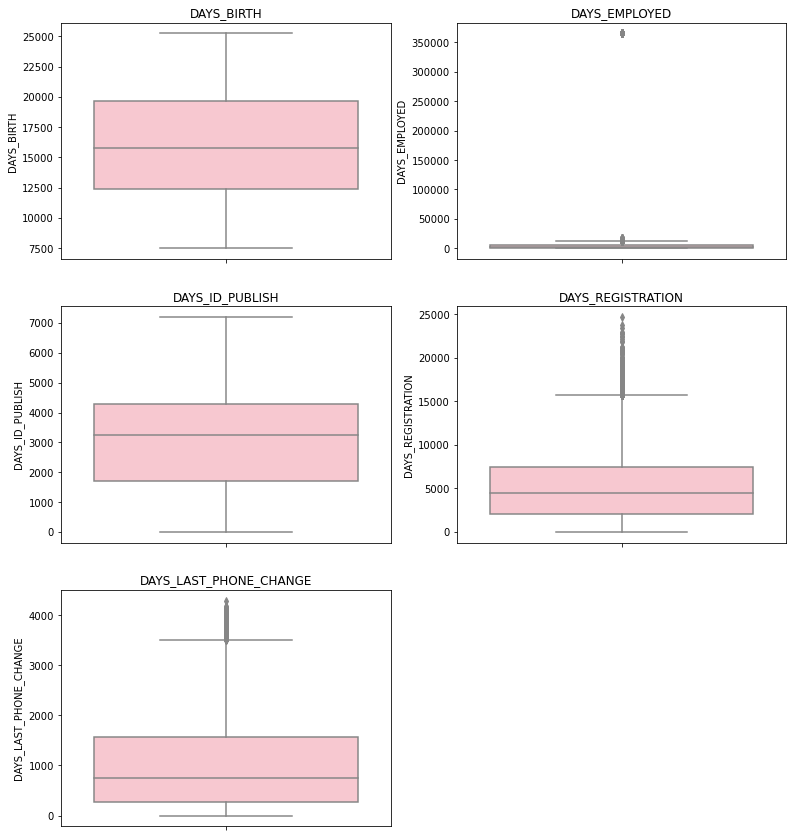

In [96]:
plt.figure(figsize=(13,20))
for i, col in enumerate(day_cols):
    plt.subplot(4, 2 , i+1)
    sns.boxplot(y = application_df[col], color="pink")
    plt.title(col)

All days-related variables have a normal distribution with little or no outliers. However, __DAYS EMPLOYED__ contains outlier values greater than 350000, which is about 958 years, which is inconceivable and hence must be an invalid entry.

In [97]:
application_df[application_df.DAYS_EMPLOYED > 350000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
8,100011,0,Cash loans,Female,No,Yes,0,112500.000,1019610.0,33826.5,...,Different,Different,Different,XNA,0.205747,1,0,1,0,0
11,100015,0,Cash loans,Female,No,Yes,0,38419.155,148365.0,10678.5,...,Different,Different,Different,XNA,0.555183,0,0,0,0,2396
23,100027,0,Cash loans,Female,No,Yes,0,83250.000,239850.0,23850.0,...,Different,Different,Different,XNA,0.624305,0,0,0,0,795
38,100045,0,Cash loans,Female,No,Yes,0,99000.000,247275.0,17338.5,...,Different,Different,Different,XNA,0.650765,0,0,0,0,0
43,100050,0,Cash loans,Female,No,Yes,0,108000.000,746280.0,42970.5,...,Different,Different,Different,XNA,0.766138,0,0,0,0,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,Female,No,Yes,0,202500.000,703728.0,29943.0,...,Different,Different,Different,XNA,0.195625,11,2,11,0,1667
307483,456227,0,Cash loans,Female,No,Yes,0,99000.000,247275.0,16479.0,...,Different,Different,Different,XNA,0.589906,1,1,1,1,1775
307487,456231,0,Cash loans,Male,No,Yes,0,117000.000,1071909.0,31473.0,...,Different,Different,Different,XNA,0.307082,0,0,0,0,846
307505,456249,0,Cash loans,Female,No,Yes,0,112500.000,225000.0,22050.0,...,Different,Different,Different,XNA,0.346391,0,0,0,0,0


In [98]:
application_df = application_df[application_df.DAYS_EMPLOYED < 350000]

In [99]:
application_df.shape

(252129, 46)

### Derived columns and Binning

__DAYS_BIRTH:__ Client's age in days at the time of application

Create __age__ from DAYS_BIRTH

In [100]:
application_df["AGE"] = application_df.DAYS_BIRTH // 365

In [101]:
# Drop redundant
application_df.drop(columns="DAYS_BIRTH", inplace=True)

<AxesSubplot:ylabel='Frequency'>

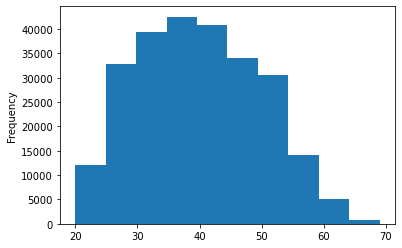

In [102]:
application_df.AGE.plot.hist()

Create __AGE_GROUP__ variable form __AGE__

In [103]:
bins = [20, 30, 40, 50, 60, 100]

labels = ["20–30","30–40","40–50","50–60","60 Above"]

application_df["AGE_GROUP"] = pd.cut(application_df.AGE, bins=bins, labels=labels)

<AxesSubplot:>

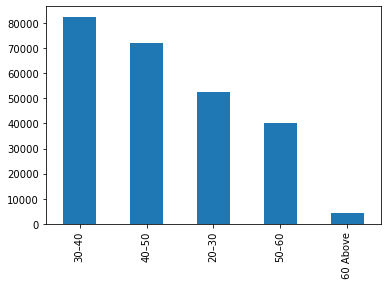

In [104]:
application_df.AGE_GROUP.value_counts().plot.bar()

__DAYS_EMPLOYED:__ How many days before the application the person started current employment

Create __YEARS_EMPLOYED__ from DAYS_EMPLOYED

In [105]:
application_df["YEARS_EMPLOYED"] = application_df.DAYS_EMPLOYED // 365

In [106]:
# Drop redundant
application_df.drop(columns="DAYS_EMPLOYED", inplace=True)

<AxesSubplot:ylabel='Frequency'>

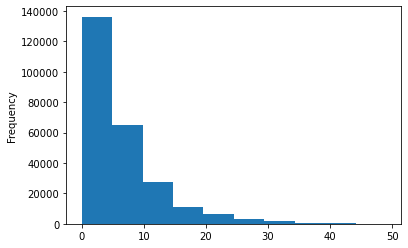

In [107]:
application_df.YEARS_EMPLOYED.plot.hist()

Create __WORK_EXPERIENCE__ variable form __YEARS_EMPLOYED__

In [108]:
bins = [0, 3, 7, 10, 20, 30, 50]
labels = ["0–3","3–7","7–10","10–20", "20–30", "30 Above"]

application_df["WORK_EXPERIENCE"] = pd.cut(application_df.YEARS_EMPLOYED, bins=bins, labels=labels)

<AxesSubplot:>

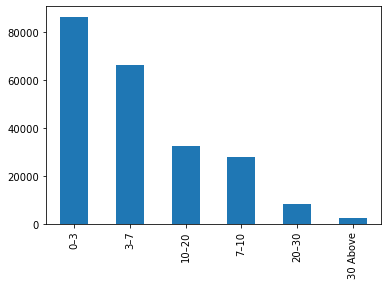

In [109]:
application_df.WORK_EXPERIENCE.value_counts().plot.bar()

Create __INCOME_RANGE__ variable from __AMT_INCOME_TOTAL__ in Lakhs

In [110]:
# convert to lakhs
application_df.AMT_INCOME_TOTAL = application_df.AMT_INCOME_TOTAL / 100000

bins = [0, 1, 2, 3, 4, 6, 8, 10, 100]
labels = ["0–1L", "1L–2L", "2L–3L", "3L–4L", "4L–6L", "6L–8L", "8L–10L", "Above 8L"]

application_df["INCOME_RANGE"] = pd.cut(application_df.AMT_INCOME_TOTAL, bins=bins, labels=labels)

<AxesSubplot:>

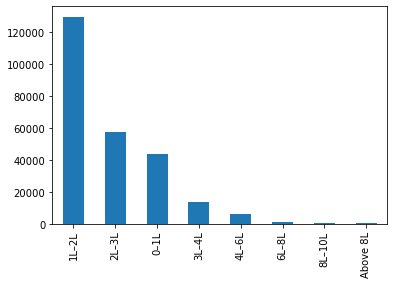

In [111]:
application_df.INCOME_RANGE.value_counts().plot.bar()

Create __CREDIT_RANGE__ variable from __AMT_CREDIT__ in Lakhs

In [112]:
# convert to lakhs
application_df.AMT_CREDIT = application_df.AMT_CREDIT / 100000

bins = [0, 1, 2, 3, 4, 6, 8, 10, 100]
labels = ["0–1L", "1L–2L", "2L–3L", "3L–4L", "4L–6L", "6L–8L", "8L–10L", "Above 8L"]

application_df["CREDIT_RANGE"] = pd.cut(application_df.AMT_CREDIT, bins=bins, labels=labels)

<AxesSubplot:>

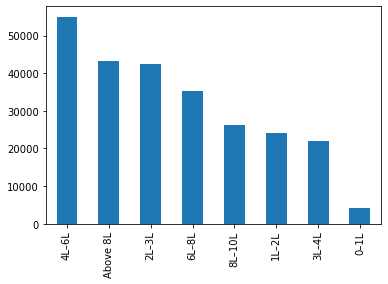

In [113]:
application_df.CREDIT_RANGE.value_counts().plot.bar()

Create __GOODS_PRICE_RANGE__ variable from __AMT_GOODS_PRICE__ in Lakhs

In [114]:
# convert to lakhs
application_df.AMT_GOODS_PRICE = application_df.AMT_GOODS_PRICE / 100000

bins = [0, 1, 2, 3, 4, 6, 8, 10, 100]
labels = ["0–1L", "1L–2L", "2L–3L", "3L–4L", "4L–6L", "6L–8L", "8L–10L", "Above 8L"]

application_df["GOODS_PRICE_RANGE"] = pd.cut(application_df.AMT_GOODS_PRICE, bins=bins, labels=labels)

<AxesSubplot:>

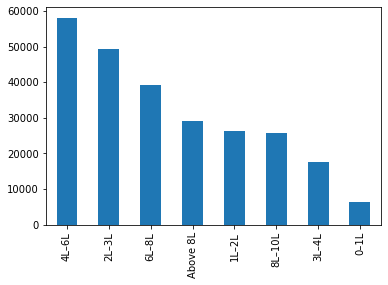

In [115]:
application_df.GOODS_PRICE_RANGE.value_counts().plot.bar()

Create __CHILDREN_COUNT__ group from CNT_CHILDREN

<AxesSubplot:>

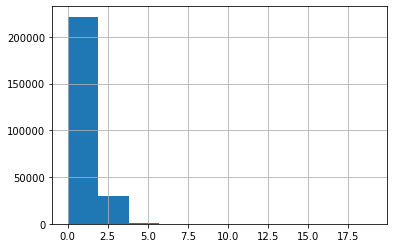

In [116]:
application_df.CNT_CHILDREN.hist()

In [117]:
bins = [0, 1, 2, 3, 4, 8, 20]
labels = ["0","1","2","3", "4–7", "Above 7"]

application_df["CHILDREN_COUNT"] = pd.cut(application_df.CNT_CHILDREN, bins=bins, labels=labels, right=False)

<AxesSubplot:>

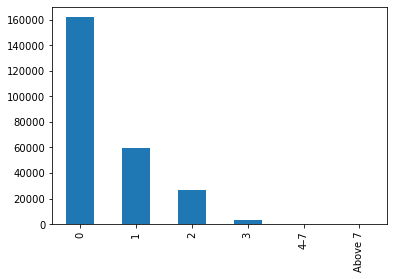

In [118]:
application_df.CHILDREN_COUNT.value_counts().plot.bar()

In [119]:
# Drop redundant
application_df.drop(columns="CNT_CHILDREN", inplace=True)

In [120]:
application_df.shape

(252129, 51)

# Analysis

## Data Imbalance

In [121]:
target_counts = round(application_df.TARGET.value_counts(normalize=True)*100, 2)
print("Repayer is {}%".format(target_counts[0]))
print("Defaulter is {}%".format(target_counts[1]))
print("The Imbalance Ratio between Repayer and Defaulter is {0:.2f}/1 (approx)".format(target_counts[0]/target_counts[1]))

Repayer is 91.34%
Defaulter is 8.66%
The Imbalance Ratio between Repayer and Defaulter is 10.55/1 (approx)


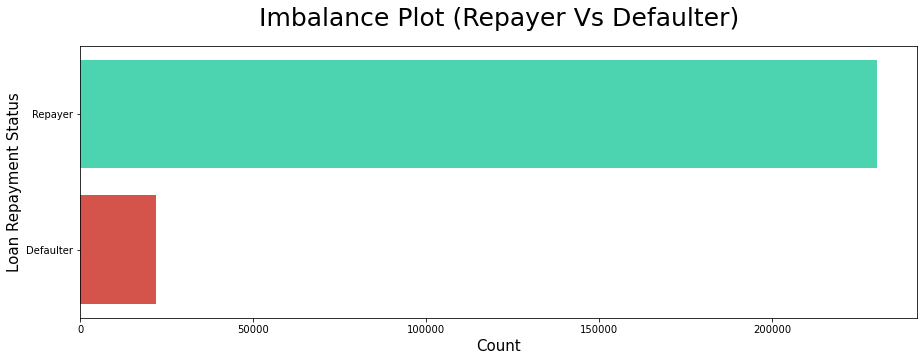

In [122]:
plt.figure(figsize= (15,5))
sns.barplot(y=["Repayer","Defaulter"], x=application_df["TARGET"].value_counts(), palette=["#34ebba","#eb4034"], orient="h")
plt.title("Imbalance Plot (Repayer Vs Defaulter)", fontdict={"fontsize":25}, pad = 20)
plt.ylabel("Loan Repayment Status", fontdict={"fontsize":15})
plt.xlabel("Count", fontdict={"fontsize":15})
plt.show()

## Univariate Analysis

### Categorical variable analysis

In [123]:
title = lambda name: name.replace("_", " ").title()

def categorical_plot(data, col, target_col, y_log=False, x_angle=False, h_layout=True):
    
    target1_percentage = data[[col, target_col]].groupby([col], as_index=False).mean()
    target1_percentage[target_col] = target1_percentage[target_col]*100
    target1_percentage.sort_values(by=target_col,inplace = True)
 
    if h_layout:
            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,7))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(24,30))
                
    # Subplot 1 - Count plot of the column 
    s = sns.countplot(ax=ax1, x=col, data=data, hue=target_col, palette=["#459e97", "#e68193"])
    ax1.set_title(title(col), fontsize = 15, pad = 15)
    ax1.legend(["Repayer", "Defaulter"])
    ax1.set_xlabel(col,fontdict={"fontsize": 13, "fontweight": 3})
    s.set_xticklabels(s.get_xticklabels(), rotation= 50*x_angle)
        
    # Subplot 2 - Percentage of defaulters in the column
    s = sns.barplot(ax=ax2, x = col, y=target_col, data=target1_percentage, palette="flare")
    ax2.set_title("Defaulters % in " + title(col), fontsize = 15, pad = 15)    
    ax2.set_xlabel(col,fontdict={"fontsize": 13, "fontweight": 3})
    ax2.set_ylabel(target_col,fontdict={"fontsize": 13, "fontweight": 3})
    s.set_xticklabels(s.get_xticklabels(), rotation= 50*x_angle)

    if y_log:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 13, 'fontweight' : 3})
    else:
        ax1.set_ylabel("Count",fontdict={'fontsize' : 13, 'fontweight' : 3})

    plt.show()

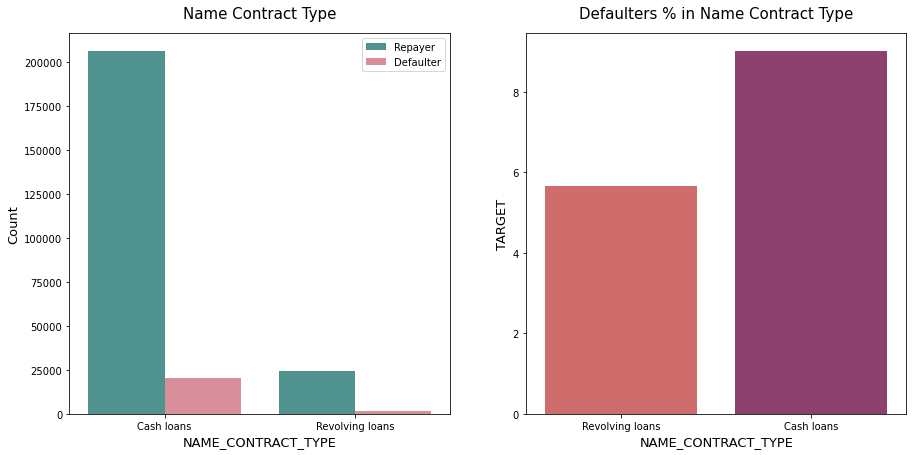

In [124]:
categorical_plot(application_df,"NAME_CONTRACT_TYPE","TARGET")

Observation: Contract type
- Revolving loans account for just a modest percentage of overall loans.
- Approximately 8-9% of cash loan applicants and 6% of revolving loan applicants default.

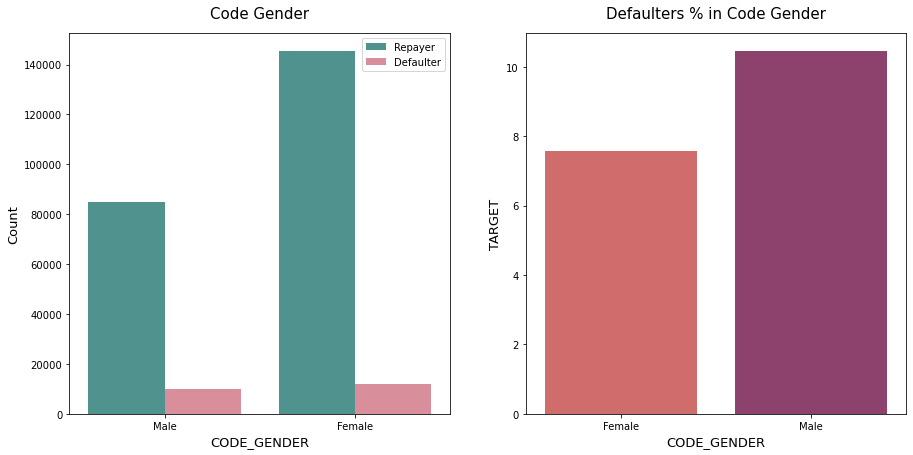

In [125]:
categorical_plot(application_df,"CODE_GENDER","TARGET")

Observation: Gender type
- Female customers outnumber male clients by almost two to one.
- According to the proportion of defaulted loans, males have a 10% chance of not returning their obligations, while women have just below 7% chance.

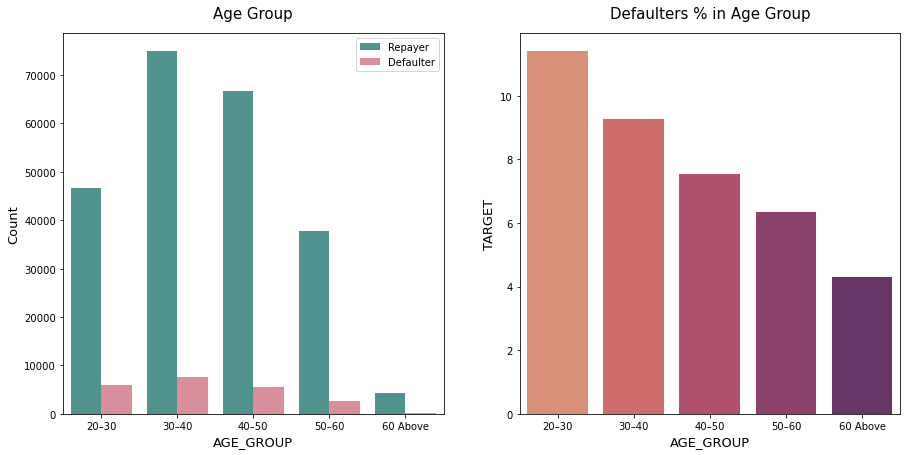

In [126]:
categorical_plot(application_df, "AGE_GROUP", "TARGET")

Observation: Age Groups
- The majority of loan applicants are between the ages of 30 – 50, with seniors above the age of 60 being less common.
- The defaulters percentage chart clearly illustrates a declining tendency in the proportion of defaulters with age, with the 20-30 age group having the highest percentage of defaulters.

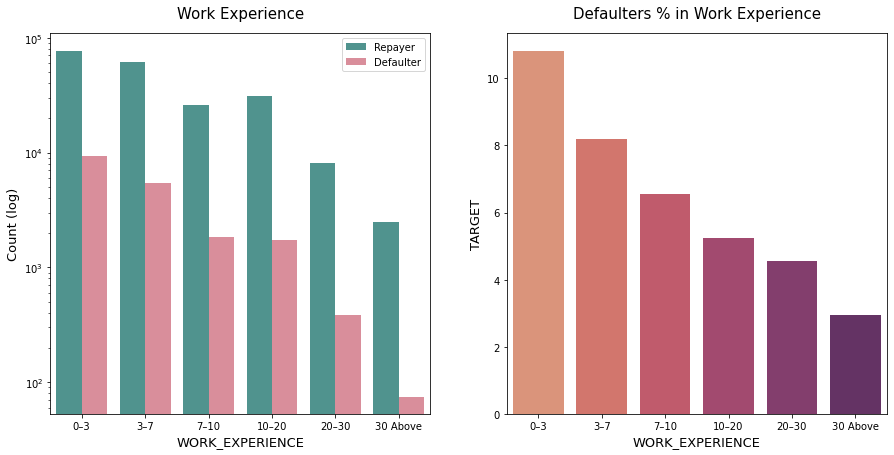

In [127]:
categorical_plot(application_df, "WORK_EXPERIENCE", "TARGET", True)

Observation: Work experience
- Clearly, the majority of loan applicants have little or no employment experience.
- The defaulters percentage chart clearly shows a downward trend in the number of defaulters associated with increasing years of work experience, with the 0-3 year experience group having the highest defaulters.

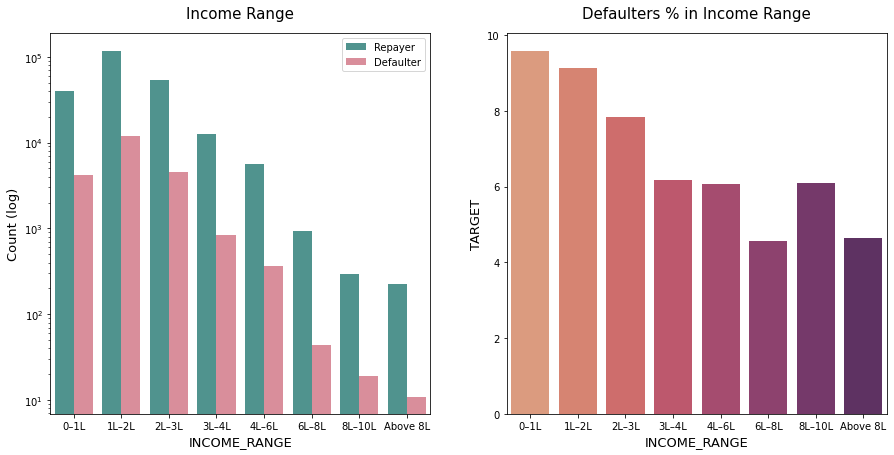

In [128]:
categorical_plot(application_df, "INCOME_RANGE", "TARGET", True)

Observation: Income range
- Evidently, the majority of loan applicants earn less than 2 lakh.
- Overall, the defaulters % chart indicates a declining trend in the number of defaulters as income increases, with applicants earning less than 3 lakhs defaulting more often.

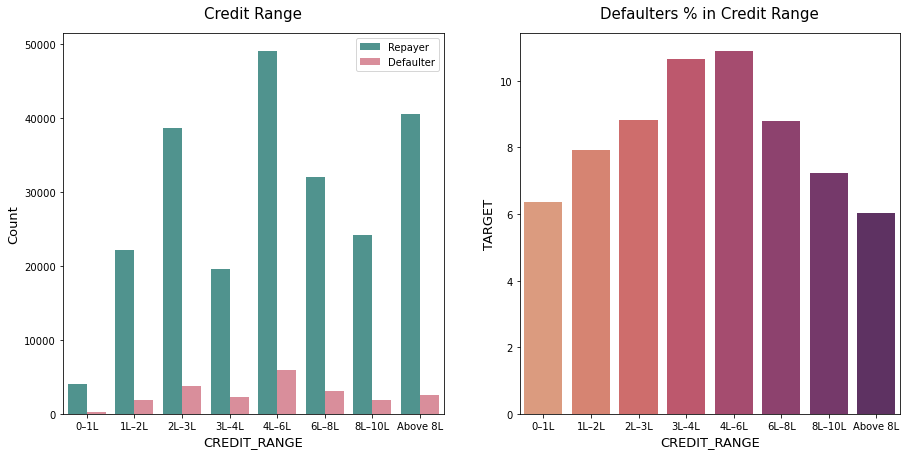

In [129]:
categorical_plot(application_df, "CREDIT_RANGE", "TARGET")

Observation: Credit range

- According to the percentage of defaulted loans, applicants with credit ranging from 3-6 lakhs have a somewhat higher than 10% likelihood of defaulting on their loans.

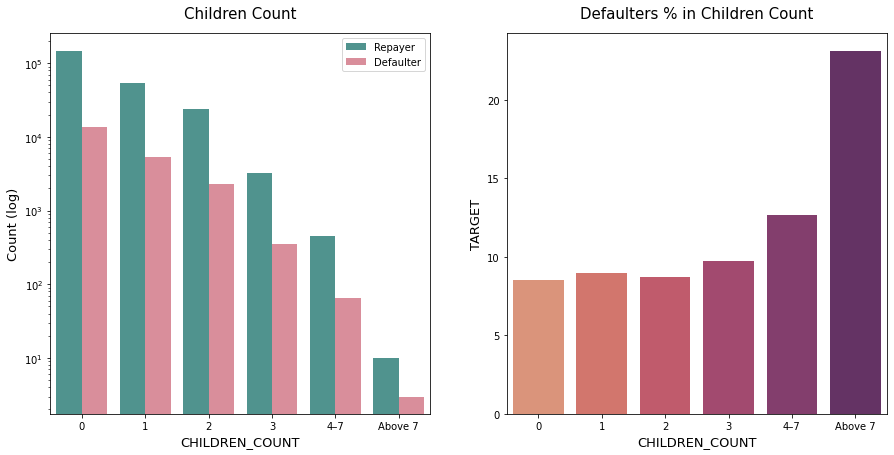

In [130]:
categorical_plot(application_df, "CHILDREN_COUNT", "TARGET", True)

Observation: Children count
- The majority of loan applicants have no children.
- As per the proportion of defaulted loans, applicants with 1-3 children account for approximately 10% of defaulters.
- Applicants with no children are more likely to repay the loan, whereas those with more than seven children are more likely to default.

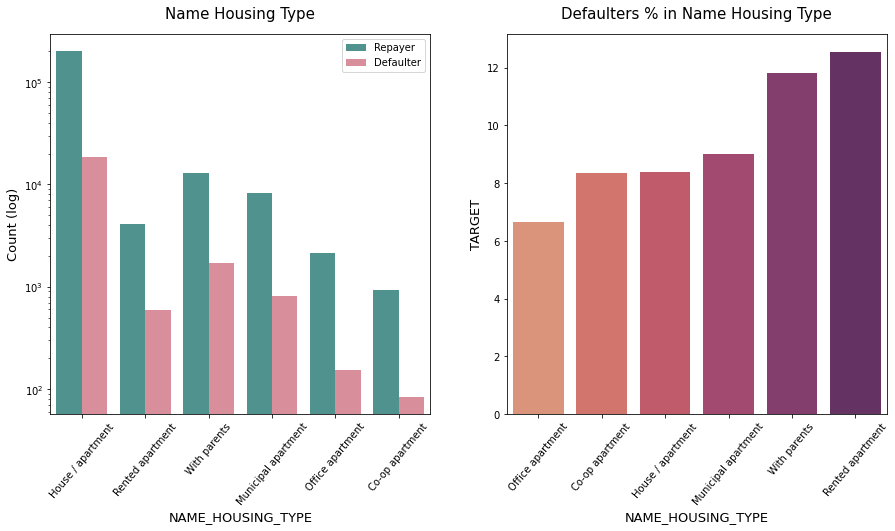

In [131]:
categorical_plot(application_df, "NAME_HOUSING_TYPE", "TARGET", True, True, True)

Observation: Housing Type
    
- The vast majority of individuals live in a house or apartment.
- Those who live in office apartments have the lowest default rate.
- Applicants who live with their parents and in leased flats have a greater chance of defaulting (roughly 12%).

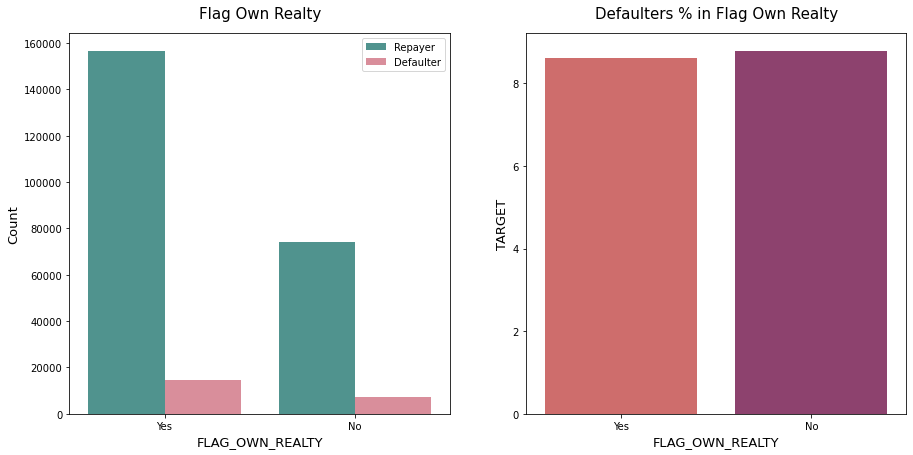

In [132]:
categorical_plot(application_df,"FLAG_OWN_REALTY","TARGET", False, False, True)

Observation: Own real estate
- Customers who own real estate outnumber those who don't by more than a factor of two.
- The default rate for both groups is about the same (8%). As a result, we may conclude that there is no link between owning a reality and defaulting on a debt.

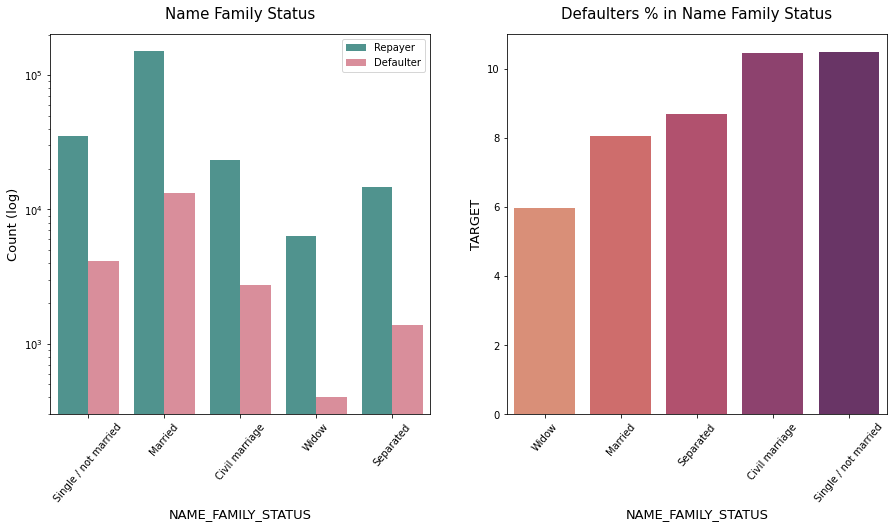

In [133]:
categorical_plot(application_df, "NAME_FAMILY_STATUS", "TARGET", True, True, True)

Observation: Family status
- The majority of those who have taken out loans are married.
- In terms of defaulters, single as well as civil marriage have the highest percentage (about 10%), while widows have the lowest (approximately 6%).

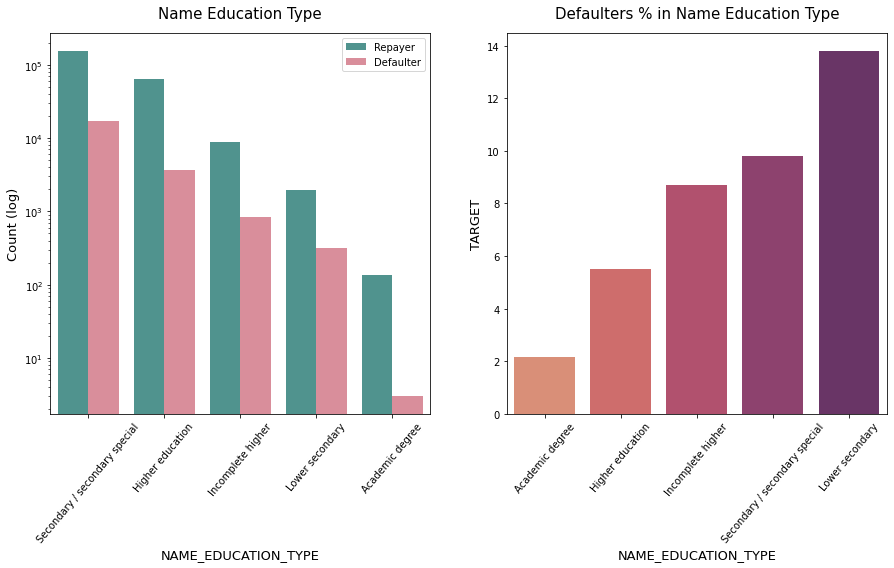

In [134]:
categorical_plot(application_df,"NAME_EDUCATION_TYPE","TARGET",True,True,True)

Observation: Education
- Clients with secondary education outnumber those with higher education, on the other hand, very few have an academic degree.
- Lower secondary education has the greatest probability of defaulting at roughly 11%, whilst those with an academic degree are the least likely to default.

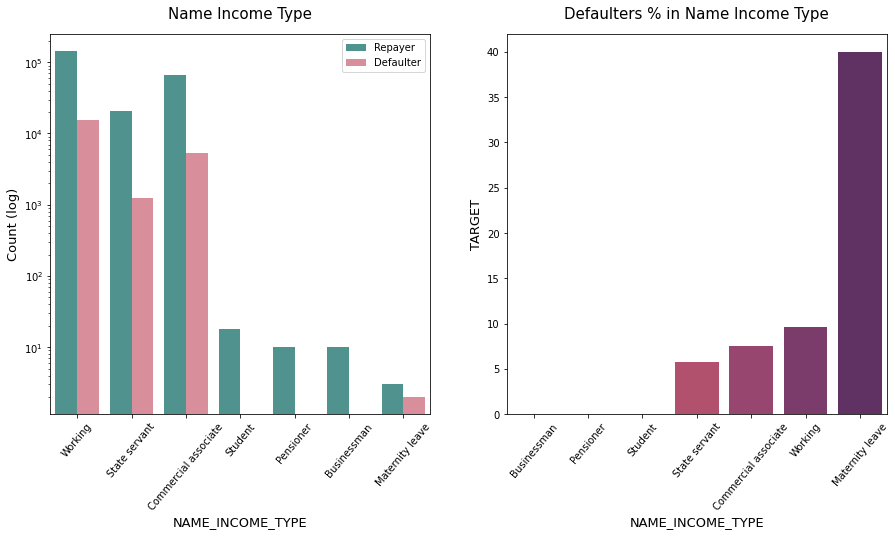

In [135]:
categorical_plot(application_df, "NAME_INCOME_TYPE", "TARGET", True, True, True)

Observation: Income Type
- The majority of loan applicants have a working income, followed by a commercial associate, and a state employee.
- Maternity leave applicants had the highest defaulting rate of 40%.
- Despite their smaller numbers, students and businessmen do not have a default record. The two most secure loan kinds.

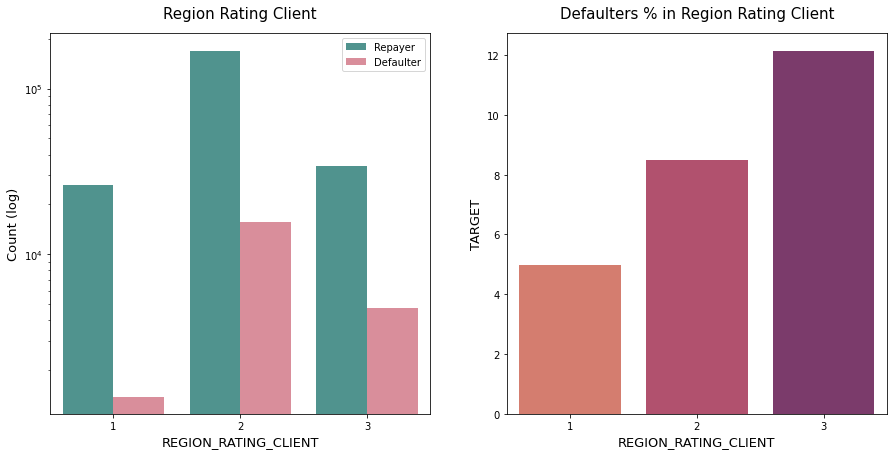

In [136]:
categorical_plot(application_df,"REGION_RATING_CLIENT","TARGET",True, False, True)

Observation: Client Region Rating
- The majority of applicants live in a Region with a Rating 2 location.
- The region with the greatest default rate is Region Rating 3(11%).
- Clients residing in Region Rating 1 has the lowest likelihood of defaulting, making loan approval safer.

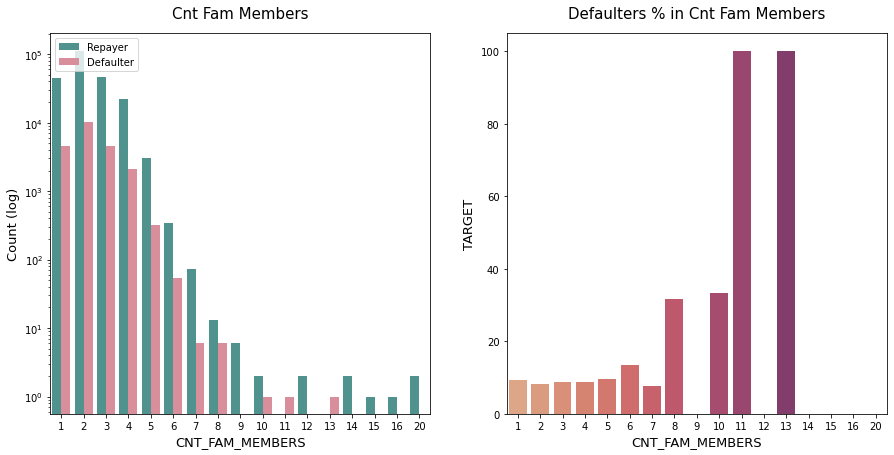

In [137]:
categorical_plot(application_df, "CNT_FAM_MEMBERS", "TARGET", True, False, True)

Observation: Family memembers count
- Family members follow the same pattern as children in that having more family members raises the probability of defaulting.

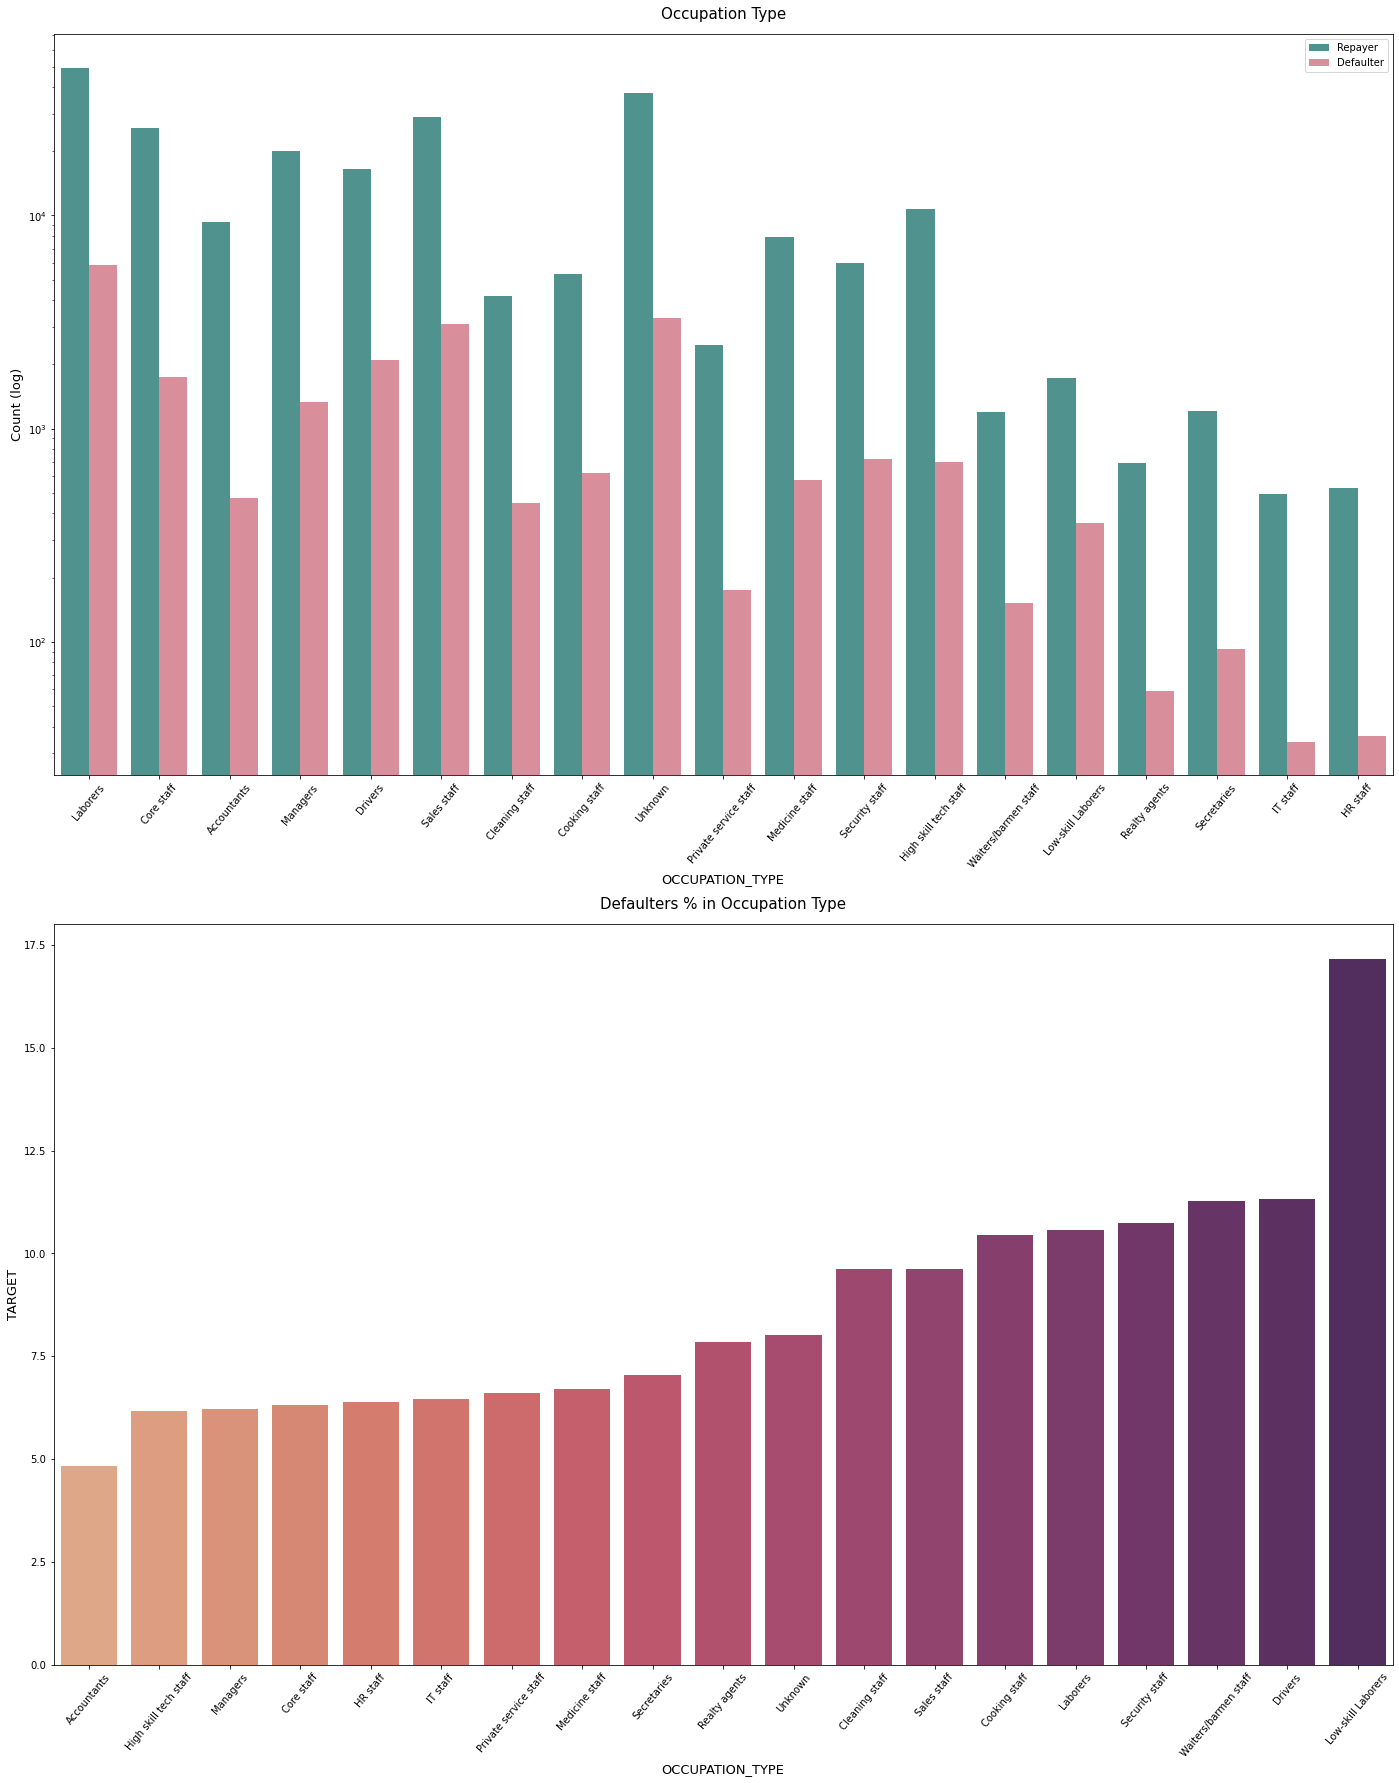

In [138]:
categorical_plot(application_df, "OCCUPATION_TYPE","TARGET", True, True, False)

Observation: Occupation Type
- Laborers are the most likely to take out loans, followed by sales people.
- IT employees are less likely to seek for a loan.
- Low-skill labourers had the largest percentage of defaulters (almost 17%), followed by drivers and waiters/bartenders, security personnel, labourers, and cooks.

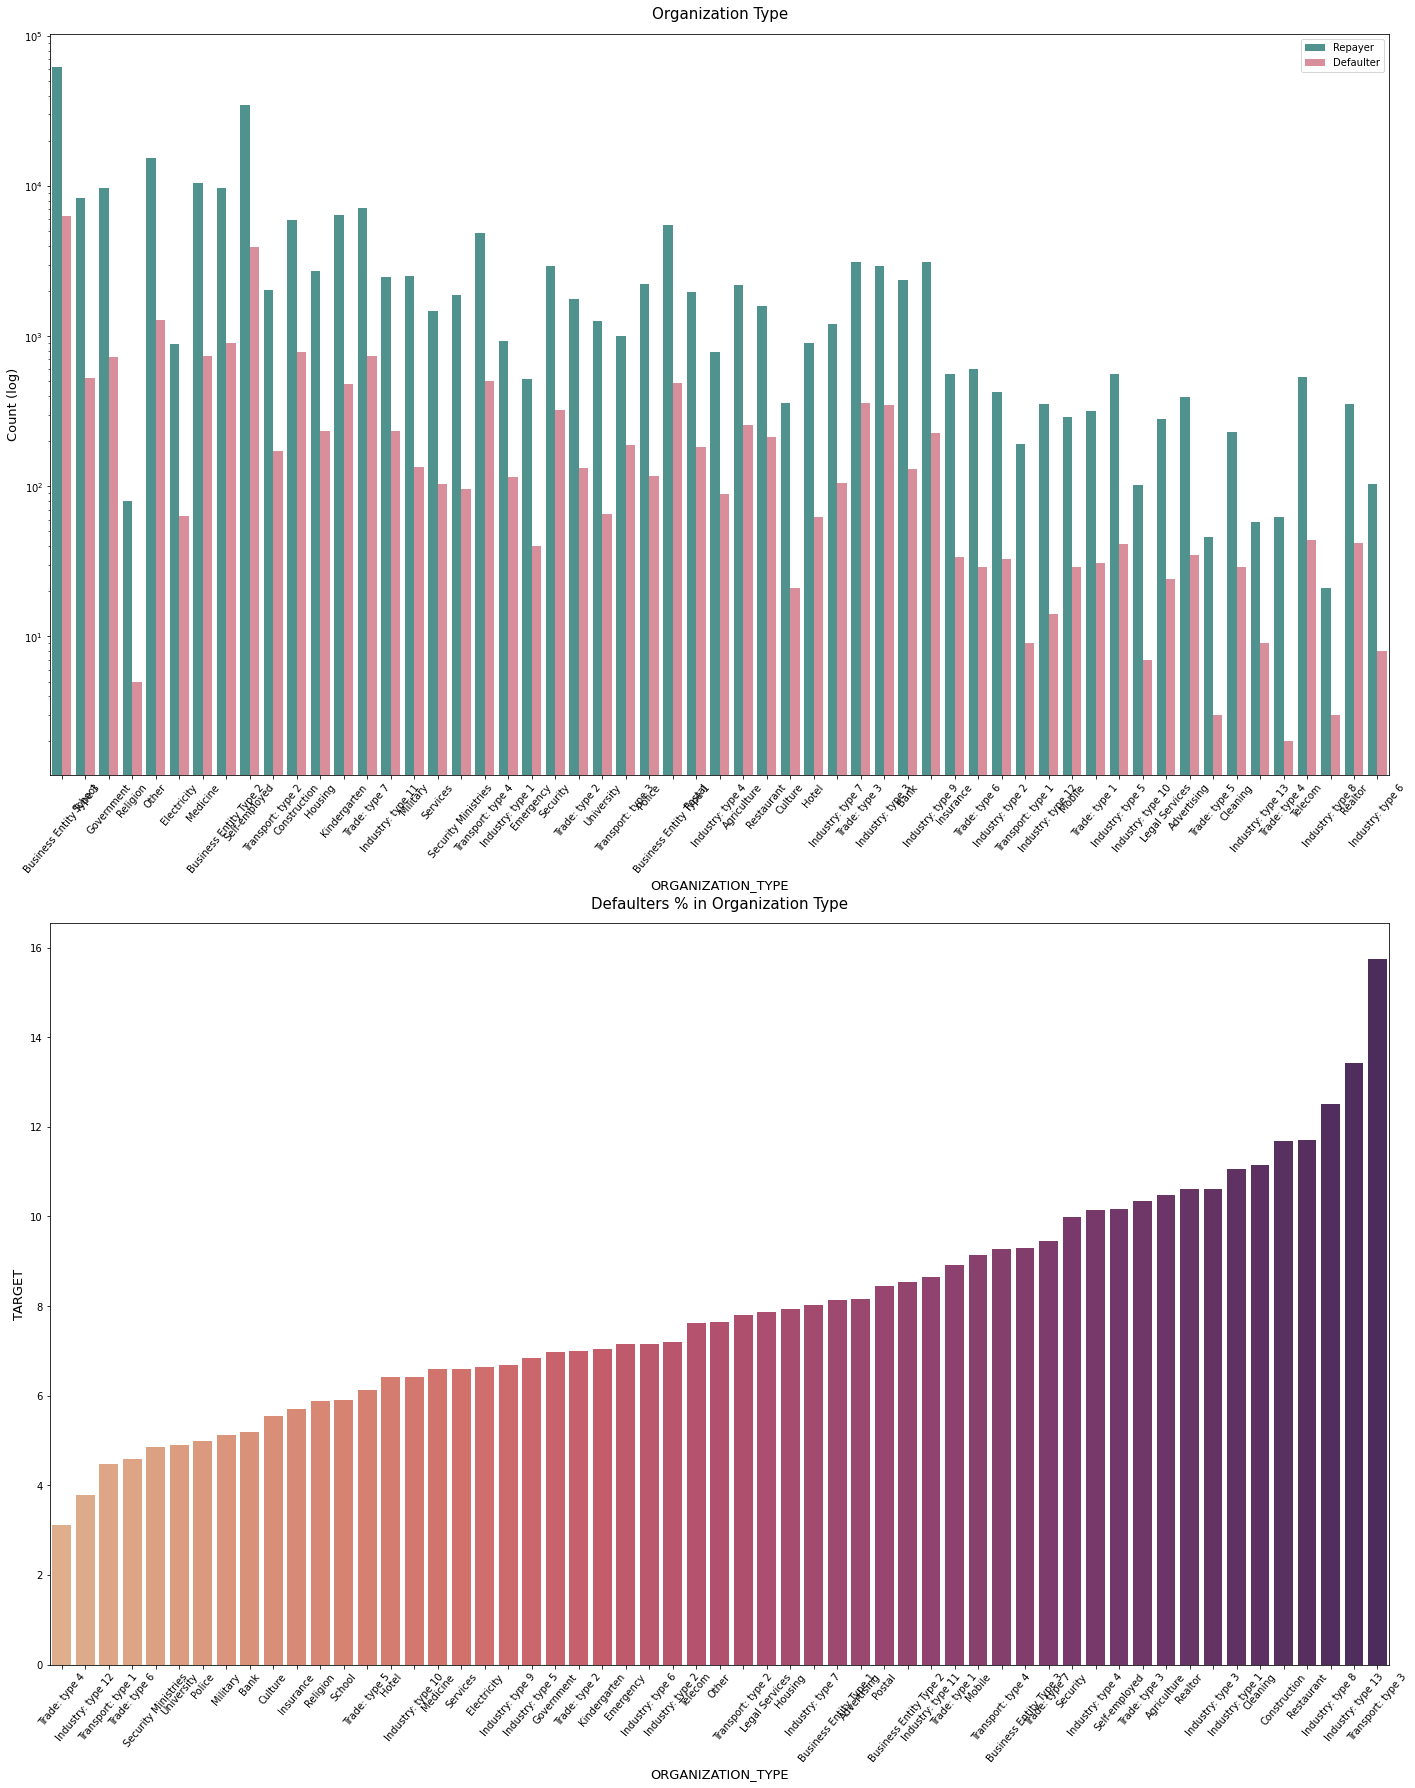

In [139]:
categorical_plot(application_df, "ORGANIZATION_TYPE","TARGET", True, True, False)

Observation: Occupation Type

- Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%), and Restaurant: type 3 (16%) are the organisations with the largest percentage of default (less than 12 percent ).
- Self-employed persons have a relatively high default rate; to be on the safe side, loan disbursement should be avoided or a loan with a higher interest rate should be provided to offset the danger of failing.
- It can be demonstrated that the following types of organisations have fewer defaulters and hence are safer to lend to: Types 4 and 5 of trade, and Type 8 of industry

### Numerical variable analysis

In [140]:
def numerical_plot(data, column):
#     plt.figure(figsize=(10,5))
    sns.displot(data, x=column, hue="TARGET", kind="kde", legend=False)
    plt.legend(labels=['Repayer','Defaulter'])
    plt.show()

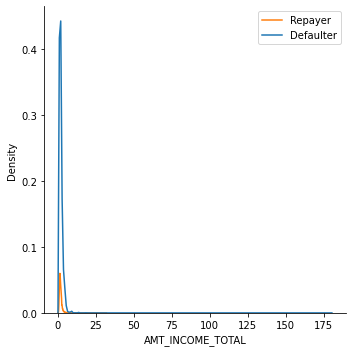

In [141]:
numerical_plot(application_df, "AMT_INCOME_TOTAL")

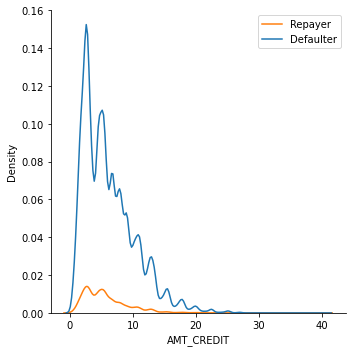

In [142]:
numerical_plot(application_df, "AMT_CREDIT")

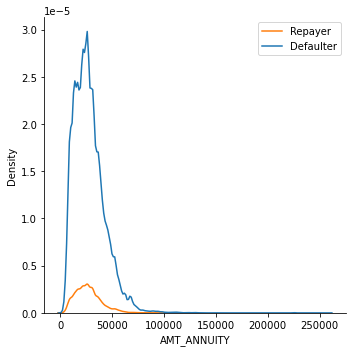

In [143]:
numerical_plot(application_df, "AMT_ANNUITY")

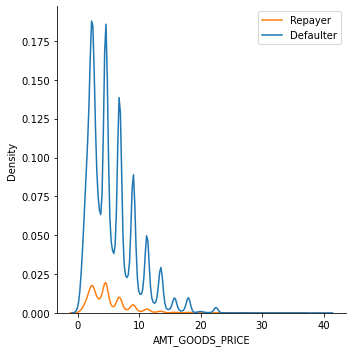

In [144]:
numerical_plot(application_df, "AMT_GOODS_PRICE")

Observation: Since the repayers and defaulters distributions overlap in all of the plots, we cannot make a conclusion based just on any of the above four continuous variables.

## Bivariate Analysis

In [145]:
application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCI

In [146]:
application_df["LOAN_STATUS"] = application_df.TARGET.map({0: "Repayer", 1: "Defaulter"})

In [147]:
def multi_plot(data, x_col, y_col, TARGET="LOAN_STATUS", y_log=True):
    fig, ax = plt.subplots(figsize=(20, 7))
    sns.boxplot(x=x_col, y=y_col, data=data, hue=TARGET, palette="Set2", hue_order=["Repayer", "Defaulter"])
    ax.set_title("Distribution of " + title(y_col) + " for Repayed and Defaulter categorised by " + title(x_col), fontsize = 15, pad = 15)  
    ax.set_xlabel(x_col,fontdict={"fontsize": 13, "fontweight": 3})
    if y_log:
        ax.set_ylabel(y_col + " (log)", fontdict={"fontsize": 13, "fontweight": 3})  
        ax.set_yscale('log')
    else:
        ax.set_ylabel(y_col, fontdict={"fontsize": 13, "fontweight": 3}) 
    plt.show()

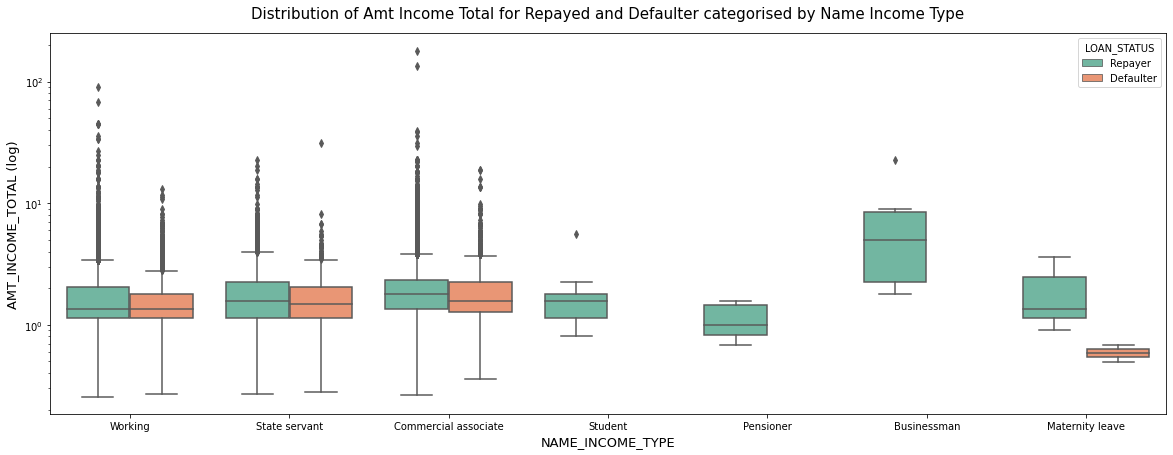

In [148]:
multi_plot(application_df, "NAME_INCOME_TYPE", "AMT_INCOME_TOTAL")

Observation: Income type and Total income
- Clients earning less and on maternity leave seem to be more likely to default on their loans, while business professionals and students had nearly no defaults regardless of income type. 

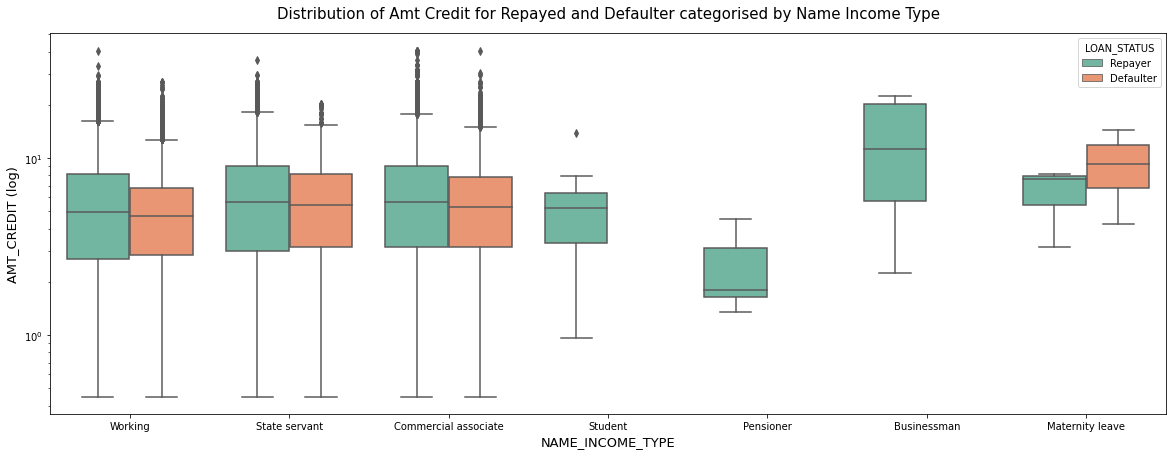

In [149]:
multi_plot(application_df, "NAME_INCOME_TYPE", "AMT_CREDIT")

Observation

- Clients with larger loan credit and on maternity leave seem to be more likely to default on their loans, while business professionals and students had nearly no defaults regardless of income type.

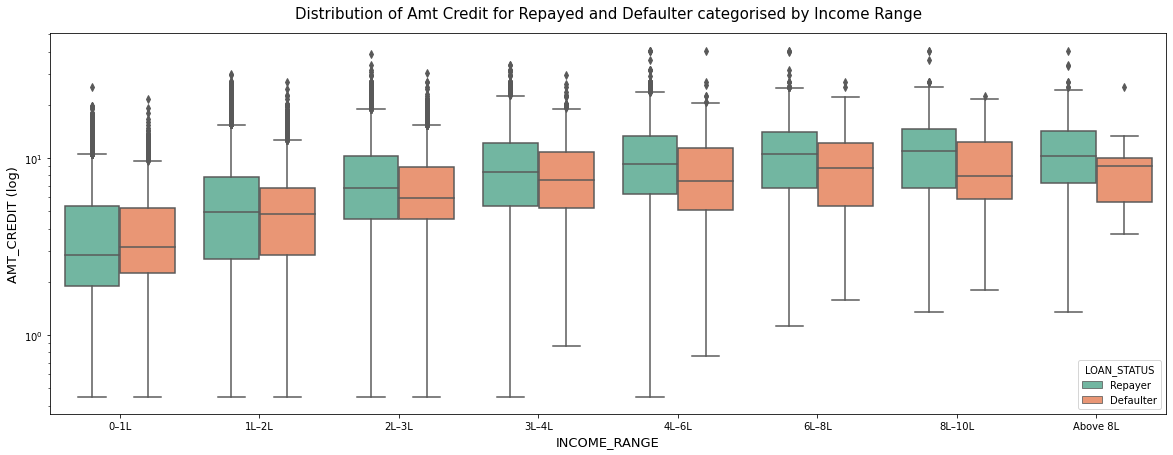

In [150]:
multi_plot(application_df, "INCOME_RANGE", "AMT_CREDIT")

Observation
- Aside from non-earners, Customers with less loan creadit, regardless of income range, are more likely to default.

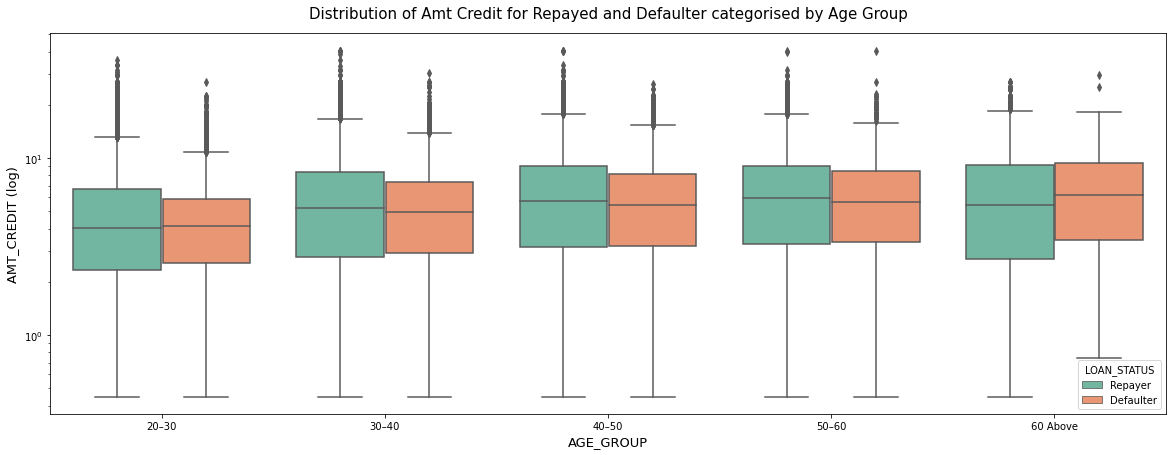

In [151]:
multi_plot(application_df, "AGE_GROUP", "AMT_CREDIT")

Observation:

- There is no substantial relationship between age group and credit amount to be a defaulter.

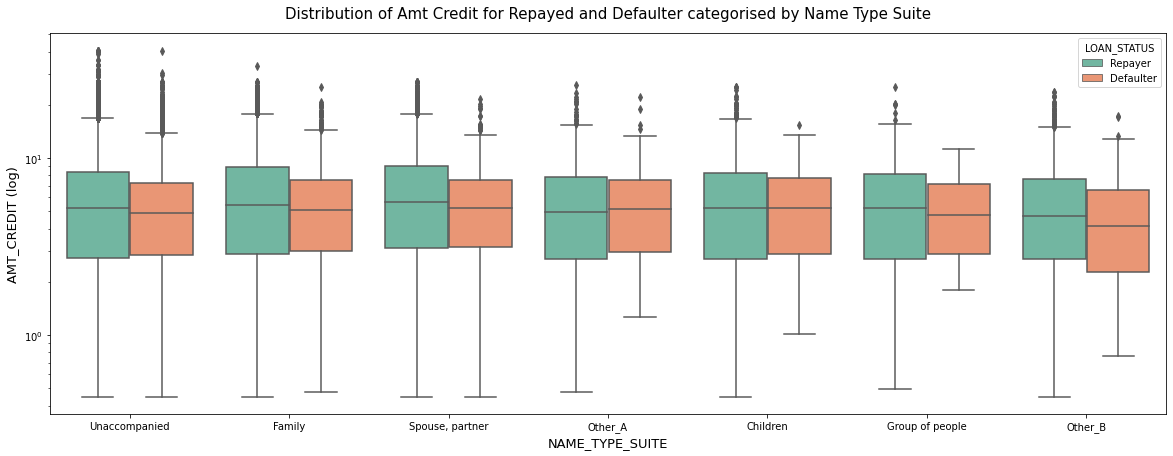

In [152]:
multi_plot(application_df, "NAME_TYPE_SUITE", "AMT_CREDIT")

Observation:
- There is no substantial relationship between housing type and credit amount to be a defaulter.

<Figure size 1080x1080 with 0 Axes>

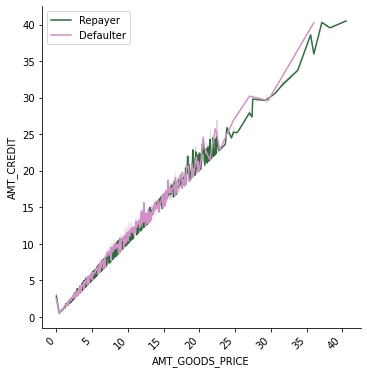

In [153]:
plt.figure(figsize=[15,15])
sns.relplot(data=application_df, x="AMT_GOODS_PRICE", y="AMT_CREDIT", hue="TARGET",
            kind="line", palette="cubehelix", legend=False)
plt.legend(labels=['Repayer','Defaulter'])
plt.xticks(rotation=45, ha='right')
plt.show()

Observation: 
 - When the loan amount exceeds 30 lakhs, the number of defaulters increases.

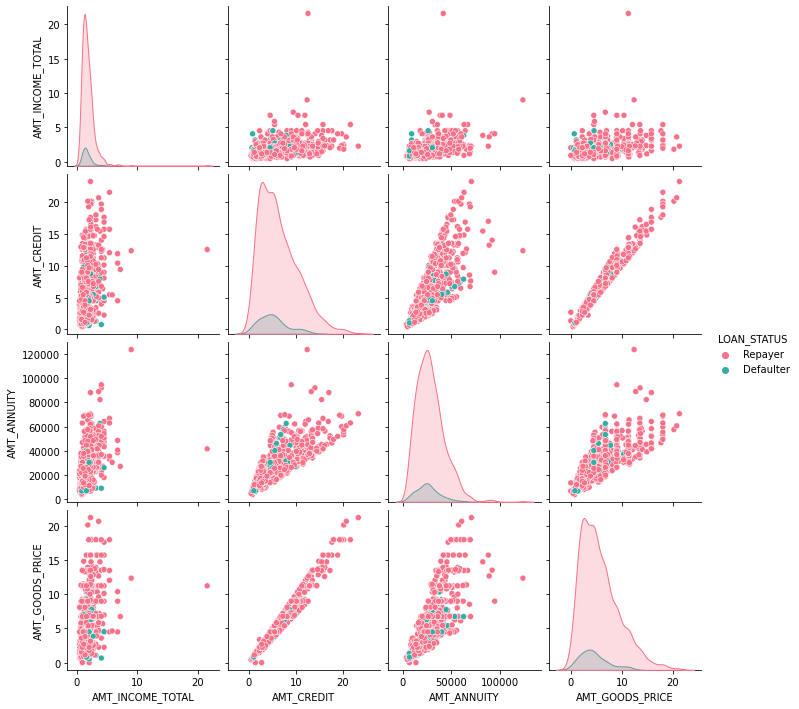

In [154]:
sns.pairplot(application_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','LOAN_STATUS']].sample(1000),
                 hue="LOAN_STATUS", palette="husl", hue_order=["Repayer", "Defaulter"])
plt.show()

Observation:

- There is a lower possibility of defaulters when the Annuity Amount > 15K and the Good Price Amount > 20 Lakhs.
- According to the scatterplot, where the majority of the data is aggregated in the shape of a line shows that Loan Amount Credit and Goods Price are highly correlated.
- For Amount Credit >20 Lakhs, there are relatively few defaulters.

## Previous Application Data

In [155]:
previous_df = pd.read_csv("previous_application.csv")
previous_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
previous_df.shape

(1670214, 37)

In [157]:
previous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [158]:
previous_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [159]:
previous_df.nunique()

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_DOWN_PAYMENT                 29278
AMT_GOODS_PRICE                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
RATE_DOWN_PAYMENT               207033
RATE_INTEREST_PRIMARY              148
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      7
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE             

### Check Missing Values

In [160]:
missing_value_percentage(previous_df)

RATE_INTEREST_PRIMARY        99.6
RATE_INTEREST_PRIVILEGED     99.6
RATE_DOWN_PAYMENT            53.6
AMT_DOWN_PAYMENT             53.6
NAME_TYPE_SUITE              49.1
DAYS_TERMINATION             40.3
NFLAG_INSURED_ON_APPROVAL    40.3
DAYS_FIRST_DRAWING           40.3
DAYS_FIRST_DUE               40.3
DAYS_LAST_DUE_1ST_VERSION    40.3
DAYS_LAST_DUE                40.3
AMT_GOODS_PRICE              23.1
CNT_PAYMENT                  22.3
AMT_ANNUITY                  22.3
dtype: float64

__Drop missing values greater than 50%__

In [161]:
missing_value_percentage(previous_df, 50)

RATE_INTEREST_PRIMARY       99.6
RATE_INTEREST_PRIVILEGED    99.6
RATE_DOWN_PAYMENT           53.6
AMT_DOWN_PAYMENT            53.6
dtype: float64

In [162]:
previous_df.drop(columns=missing_value_percentage(previous_df, 50).index, inplace=True)

In [163]:
missing_value_percentage(previous_df)

NAME_TYPE_SUITE              49.1
DAYS_FIRST_DUE               40.3
DAYS_TERMINATION             40.3
DAYS_FIRST_DRAWING           40.3
NFLAG_INSURED_ON_APPROVAL    40.3
DAYS_LAST_DUE_1ST_VERSION    40.3
DAYS_LAST_DUE                40.3
AMT_GOODS_PRICE              23.1
CNT_PAYMENT                  22.3
AMT_ANNUITY                  22.3
dtype: float64

Impute __NAME_TYPE_SUITE__ missing values since it has significance in the loan repayment 

In [164]:
previous_df.NAME_TYPE_SUITE = previous_df.NAME_TYPE_SUITE.fillna("Unknown")

Check data in the columns with null values

In [165]:
missing_value_percentage(previous_df)

NFLAG_INSURED_ON_APPROVAL    40.3
DAYS_LAST_DUE                40.3
DAYS_LAST_DUE_1ST_VERSION    40.3
DAYS_FIRST_DUE               40.3
DAYS_FIRST_DRAWING           40.3
DAYS_TERMINATION             40.3
AMT_GOODS_PRICE              23.1
CNT_PAYMENT                  22.3
AMT_ANNUITY                  22.3
dtype: float64

In [166]:
previous_df[missing_value_percentage(previous_df).index].describe()

,NFLAG_INSURED_ON_APPROVAL,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,DAYS_TERMINATION,AMT_GOODS_PRICE,CNT_PAYMENT,AMT_ANNUITY
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.284699e+06,1.297984e+06,1.297979e+06
mean,0.332570,76582.403064,33767.774054,13826.269337,342209.855039,81992.343838,2.278473e+05,1.605408e+01,1.595512e+04
std,0.471134,149647.415123,106857.034789,72444.869708,88916.115834,153303.516729,3.153966e+05,1.456729e+01,1.478214e+04
min,0.000000,-2889.000000,-2801.000000,-2892.000000,-2922.000000,-2874.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,-1314.000000,-1242.000000,-1628.000000,365243.000000,-1270.000000,5.084100e+04,6.000000e+00,6.321780e+03
50%,0.000000,-537.000000,-361.000000,-831.000000,365243.000000,-499.000000,1.123200e+05,1.200000e+01,1.125000e+04
75%,1.000000,-74.000000,129.000000,-411.000000,365243.000000,-44.000000,2.340000e+05,2.400000e+01,2.065842e+04
max,1.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,6.905160e+06,8.400000e+01,4.180581e+05


Day column values are in negetive which should be converted to positive

In [167]:
day_cols = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']
previous_df[day_cols] = abs(previous_df[day_cols])

__Derived Variable for DAYS_DECISION__

In [168]:
previous_df["YEARLY_DECISION"] = previous_df.DAYS_DECISION // 365

<AxesSubplot:ylabel='Frequency'>

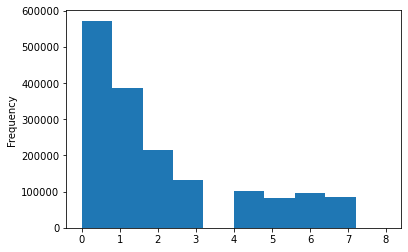

In [169]:
previous_df.YEARLY_DECISION.plot.hist()

In [170]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 10]
labels = ["1", "2", "3", "4", "5", "6", "7", "Above 7"]
previous_df.YEARLY_DECISION = pd.cut(previous_df.YEARLY_DECISION, bins, labels=labels)

<AxesSubplot:>

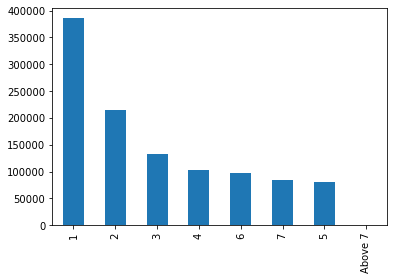

In [171]:
previous_df.YEARLY_DECISION.value_counts().plot.bar()

Check and impute __Amount__ variable missing values

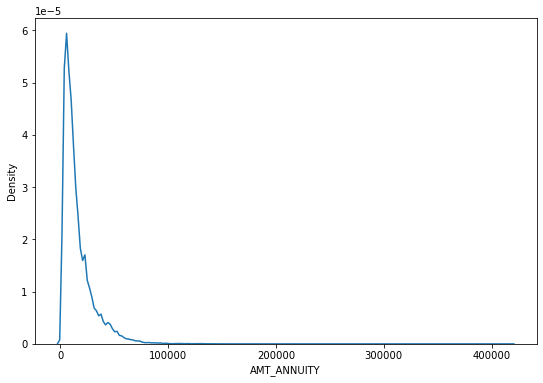

In [172]:
plt.figure(figsize=(9,6))
sns.kdeplot(previous_df.AMT_ANNUITY)
plt.show()

There is a single peak on the left side of the distribution, indicating the existence of outliers, and so imputing with mean would be incorrect. Imputing with median would be correct.

In [173]:
previous_df.AMT_ANNUITY.fillna(previous_df.AMT_ANNUITY.median(), inplace = True)

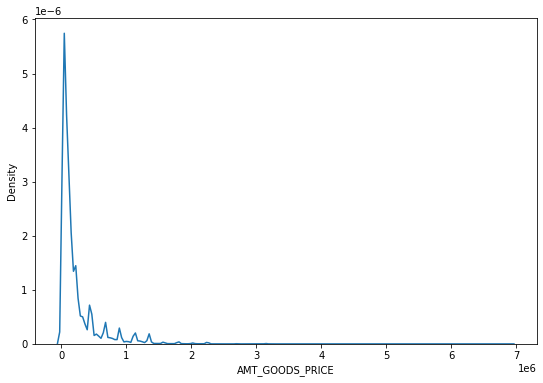

In [174]:
plt.figure(figsize=(9,6))
sns.kdeplot(previous_df.AMT_GOODS_PRICE)
plt.show()

Despite the fact that there are many minor peaks, the peak on the left is the most prominent, thus we will impute it with a median similar to Annuity.

In [175]:
previous_df.AMT_GOODS_PRICE.fillna(previous_df.AMT_GOODS_PRICE.median(), inplace = True)

In [176]:
missing_value_percentage(previous_df)

DAYS_TERMINATION             40.3
DAYS_LAST_DUE                40.3
DAYS_LAST_DUE_1ST_VERSION    40.3
DAYS_FIRST_DUE               40.3
DAYS_FIRST_DRAWING           40.3
NFLAG_INSURED_ON_APPROVAL    40.3
YEARLY_DECISION              34.2
CNT_PAYMENT                  22.3
dtype: float64

The missing numbers in __CNT PAYMENT__ could indicate that they have not yet begun paying.

In [177]:
previous_df["CNT_PAYMENT"].fillna(0, inplace=True)

### Identify Outliers

Examine the outliers for the continuous variables.

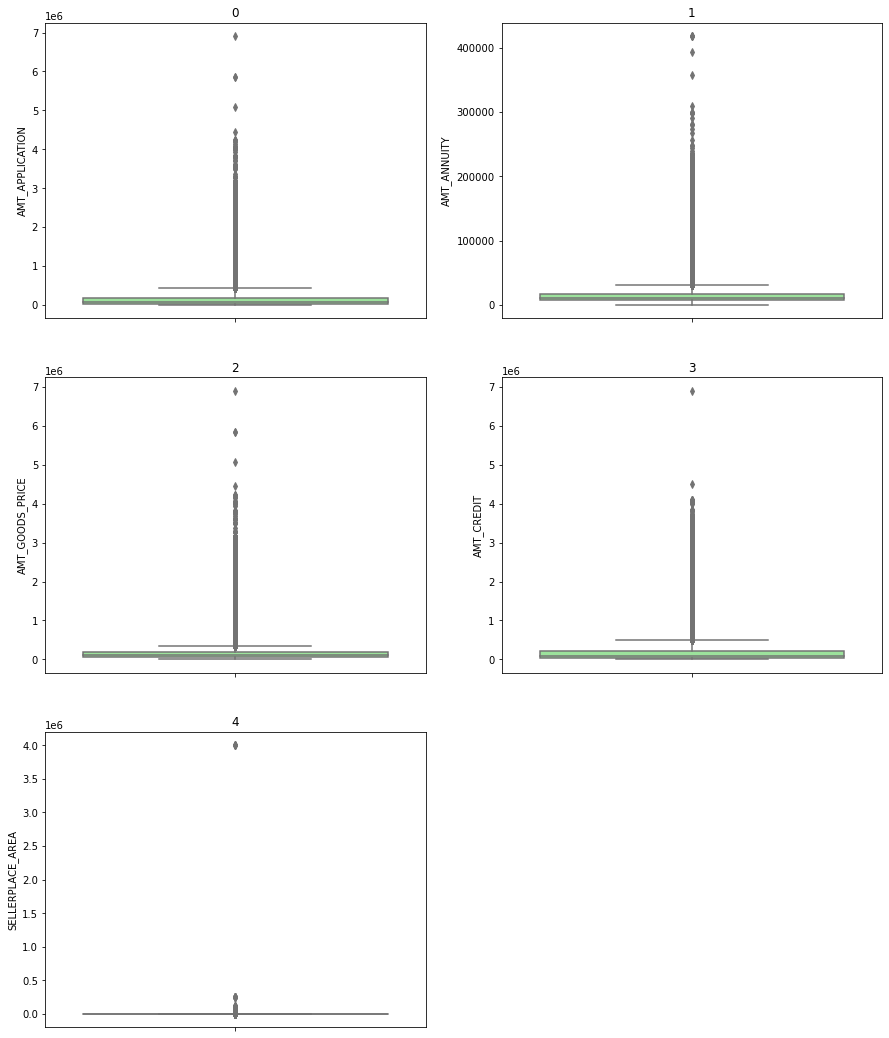

In [178]:
plt.figure(figsize=(15,25))
for i, c in enumerate(["AMT_APPLICATION", "AMT_ANNUITY", "AMT_GOODS_PRICE", "AMT_CREDIT", "SELLERPLACE_AREA"]):
    plt.subplot(4, 2, i+1)
    sns.boxplot(y=previous_df[c], color="lightgreen")
    plt.title(i)

Outliers seem to exist in all of the observed variables plotted above.

## Analysis

### Merge and analyse data

In [179]:
merged_df = pd.merge(application_df, previous_df, on='SK_ID_CURR', how='inner')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,YEARLY_DECISION
0,100002,1,Cash loans,Male,No,Yes,2.025,4.065975,24700.5,3.510,...,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0,1
1,100003,0,Cash loans,Female,No,No,2.700,12.935025,35698.5,11.295,...,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0,2
2,100003,0,Cash loans,Female,No,No,2.700,12.935025,35698.5,11.295,...,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0,2
3,100003,0,Cash loans,Female,No,No,2.700,12.935025,35698.5,11.295,...,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0,6
4,100004,0,Revolving loans,Male,Yes,Yes,0.675,1.350000,6750.0,1.350,...,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0,0.0,2


In [180]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140057 entries, 0 to 1140056
Data columns (total 85 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1140057 non-null  int32   
 1   TARGET                        1140057 non-null  int32   
 2   NAME_CONTRACT_TYPE_x          1140057 non-null  object  
 3   CODE_GENDER                   1140057 non-null  object  
 4   FLAG_OWN_CAR                  1140057 non-null  object  
 5   FLAG_OWN_REALTY               1140057 non-null  object  
 6   AMT_INCOME_TOTAL              1140057 non-null  float64 
 7   AMT_CREDIT_x                  1140057 non-null  float64 
 8   AMT_ANNUITY_x                 1139964 non-null  float64 
 9   AMT_GOODS_PRICE_x             1140057 non-null  float64 
 10  NAME_TYPE_SUITE_x             1140057 non-null  object  
 11  NAME_INCOME_TYPE              1140057 non-null  object  
 12  NAME_EDUCATION

__Graphing the association between Total revenue and Social circle default count__

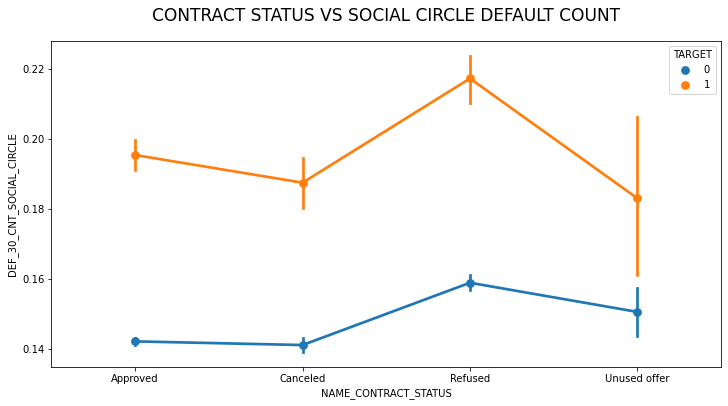

In [181]:
plt.figure(figsize=(12,6))
sns.pointplot(data=merged_df, x="NAME_CONTRACT_STATUS", y="DEF_30_CNT_SOCIAL_CIRCLE", hue="TARGET")
plt.title("CONTRACT STATUS VS SOCIAL CIRCLE DEFAULT COUNT", fontsize=17, pad=20)
plt.show()

Observation:

Clients with a DEFAULT 30 COUNT SOCIAL CIRCLE score of 0.18 or above are more likely to default, hence analysing the client's social circle might aid in loan disbursement.

#### Categorical Analysis

In [182]:
def categorical_merged_plot(data, col, hue, ylog, figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(data=data, x=col, hue=hue, palette="husl")
    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)", fontsize=17)     
    else:
        plt.ylabel("Count", fontsize=17)       
    plt.title(title(col), fontsize=20, pad=20) 
    plt.xlabel(col, fontsize=17)  
    plt.legend(loc = "upper right")
    plt.xticks(rotation=50)
    plt.show()

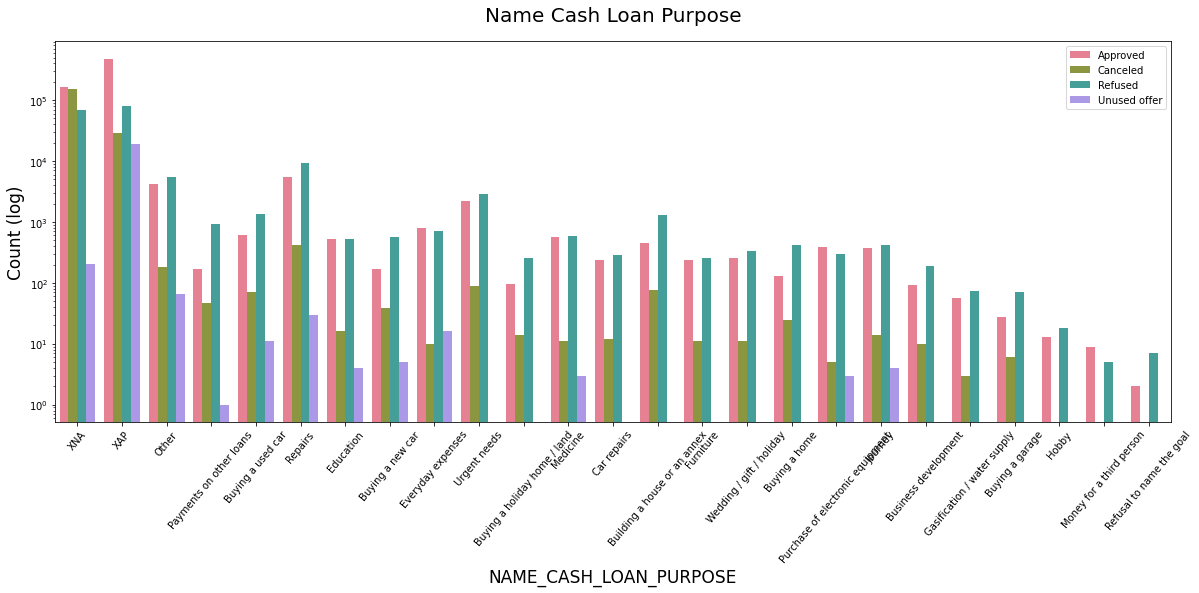

In [183]:
categorical_merged_plot(merged_df[merged_df.TARGET==0], "NAME_CASH_LOAN_PURPOSE", "NAME_CONTRACT_STATUS", True, (20,7))

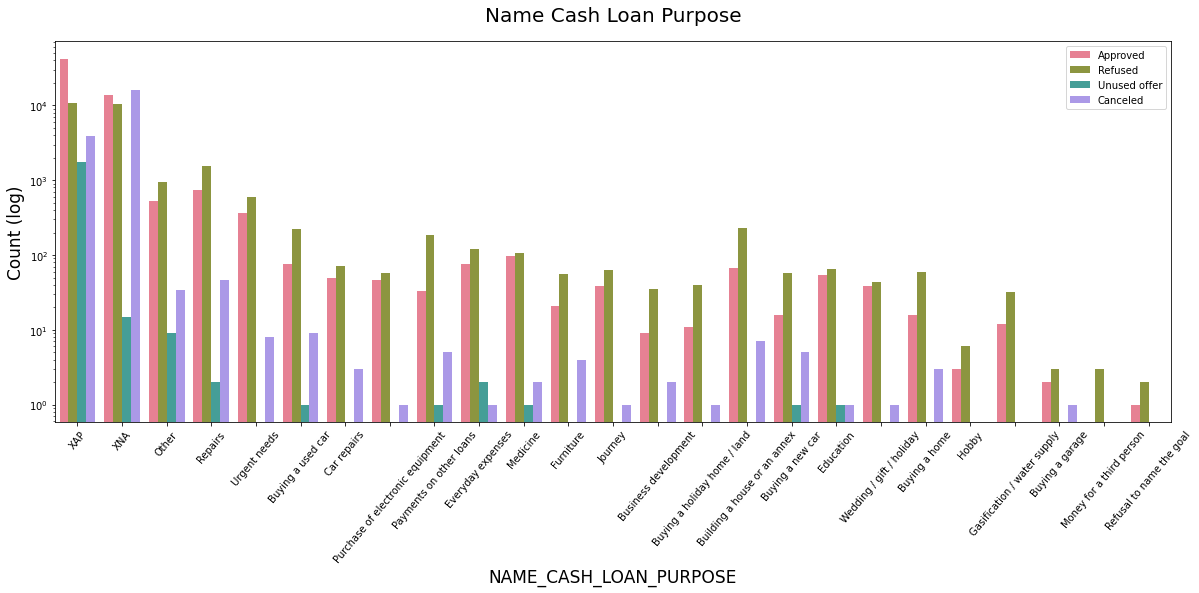

In [184]:
categorical_merged_plot(merged_df[merged_df.TARGET==1], "NAME_CASH_LOAN_PURPOSE", "NAME_CONTRACT_STATUS", True, (20,7))

Observation:

- There are a larger number of unknown loan reasons, and loans obtained for the purpose of repairs seem to have the greatest default rate.
- A large percentage of applications for Repair or Other have been denied by banks or declined by clients. Furthermore, they are either refused or the bank gives a loan with a high interest rate that the consumers cannot afford, and they decline the loan.

__Analyzing loan repayment status to determine whether there is a business or financial loss__

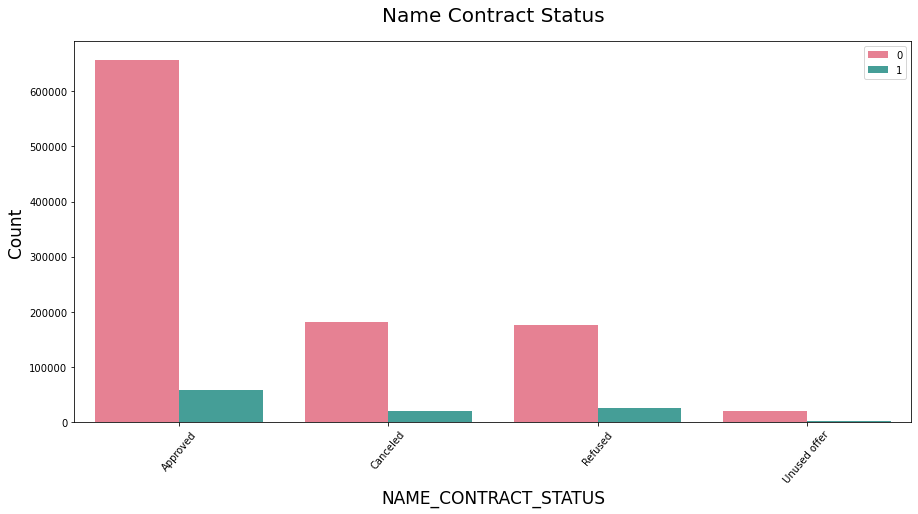

Counts  Percentage
NAME_CONTRACT_STATUS TARGET                    
Approved             0       657609       91.86
                     1        58295        8.14
Canceled             0       181475       89.95
                     1        20282       10.05
Refused              0       175572       87.11
                     1        25979       12.89
Unused offer         0        19069       91.48
                     1         1776        8.52

In [185]:
categorical_merged_plot(merged_df, "NAME_CONTRACT_STATUS", "TARGET", False, (15,7))
contract_group = merged_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
pd.concat([contract_group.value_counts(), round(contract_group.value_counts(normalize=True) * 100, 2)], 
          keys=('Counts','Percentage'), axis=1)

Obsrevation:
    
- 90% of the previously terminated clients have paid back their loans. 
- 88% of consumers who were previously rejected a loan have paid it back.

# Results

__Below is the analysis with relevant elements and classification based on which the bank may determine a client's repayment ability__

### Factors that influence whether or not an applicant is likely to repay

1. __REGION_RATING_CLIENT__: Rating 1 is the safest.
2. __NAME_EDUCATION_TYPE__: Academic degree has fewer defaults.
3. __NAME_INCOME_TYPE__: Businessmen and Students have little or no defaults.
4. __DAYS_EMPLOYED__: Applicants with more than 40 years of expertise have a default rate of less than 1%.
5. __AMT_INCOME_TOTAL__: Clients earning more over 7 lakhs have a lower risk of default.
6. __ORGANIZATION_TYPE__:Applicants belonging to Industry Types 4 and 5 have defaulted at a rate of less than 3%.
7. __AMT_CREDIT__:Applicants with loan amounts less than Rs. 30 lakhs have the lowest default rate.

### Factors that influence whether or not an applicant is likely to default

1. __DAYS_EMPLOYED__: Individuals with fewer than five years of job experience have a significant default rate.
2. __CODE_GENDER__: Men default at a larger rate than women.
3. __NAME_EDUCATION_TYPE__: Individuals with a secondary or lower secondary education are more likely to defaulter
4. __NAME_FAMILY_STATUS__: Individuals who are single or had civil marriages often default.
5. __NAME_INCOME_TYPE__: People who are unemployed or on maternity leave often default.
6. __CNT_CHILDREN:__ Clients with 7 or more children are substantially more likely to default.
7. __REGION_RATING_CLIENT__: Residents of Rating 3 locales have the greatest default rates.
8. __AMT_GOODS_PRICE__: When the loan amount exceeds 3 lakhs, the number of defaulters increases.
9. __AMT_INCOME_TOTAL__: Individuals earning less than two lakhs are more prone to default.
10. __OCCUPATION_TYPE:__ The default rate for low-skilled labourers, drivers, and waiters/bartenders, as well as security personnel, labourers, and cooks, is quite high.

### Suggestions

1. Ninety percent of the previously cancelled customers have actually paid back the loan in full and on schedule. Keep track of the reasons for the cancellation so that the bank may better identify and negotiate conditions with clients who want to pay back in the future.
2. Almost Ninety percent of the customers who were previously turned down for a loan by a bank have now become repaid customers. Documenting the reasons for denial might help to minimise company losses, and these customers may be approached again for more loans.
3. A large proportion of loan applications come from individuals who live in rented flats and live with their parents, therefore extending the loan would lessen the damage if any of them defaulted.